<img src="https://storage.googleapis.com/kaggle-datasets-images/4749485/8053271/ead2524e9a9ed5d65d920e5f9d807d15/dataset-cover.png?t=2024-04-07-11-33-07" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Indian Rental House Price - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2024-07-14 00:00:00 (Monday)</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Chú ý: Học viên tạo folder trên Google Drive theo cú pháp: DL04_HoVaTen_Thi, upload toàn bộ bài thi lên >> Share folder này cho thầy theo email: datafarmer2019@gmail.com để thầy chấm điểm. Yêu cầu: Nộp bài đúng deadline. Bài làm giống nhau bị trừ điểm.

### Your information:
- Fullname: Cao Thanh Bằng
- Date of birth: 04/05/2005
- Place of birth: Ho Chi Minh city
- Email: thanhbangcao04052005@gmail.com
- Mobile phone: 0708546905

In this notebook, we practice all the knowledge and skills that we have learned in this course (DL04: Data pre-processing and Analysis)

We apply the **Linear Regression Algorithm** to predict: **"Price"** by accuracy evaluation methods.

<!-- Please read [Gemstone price prediction information](https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction) carefully before you do this project! -->

Dataset: Indian_housing_Delhi_data.csv

#### Data dictionary:


* House Type: Type of house (e.g., apartment, villa, duplex).
* House Size: Size of the house in square feet or square meters.
* Location: Specific area or neighborhood where the property is located.
* City: City in India where the property is situated.
* Latitude: Geographic latitude coordinates of the property location.
* Longitude: Geographic longitude coordinates of the property location.
* Price: Rental price of the house.
* Currency: Currency in which the price is denoted (e.g., INR - Indian Rupees).
* Number of Bathrooms: Total number of bathrooms in the house.
* Number of Balconies: Total number of balconies in the house.
* Negotiability: Indicates whether the price is negotiable (Yes/No).
* Price per Square Foot: Price of the house per square foot.
* Verification Date: Date when the rental information was verified.
* Description: Additional description or details about the property.
* Security Deposit: Amount of security deposit required for renting the property.
* Status: Indicates the furnishing status of the property (furnished, unfurnished, semi-furnished).



### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

## Import library package

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analysis.analyzer import TTTH_Analyzer
from processor.feature import FeatureProcessor

In [255]:
_analyzer = TTTH_Analyzer()
_processor = FeatureProcessor()

## Read dataset and check overview

In [256]:
data = pd.read_csv('input_data/Indian_housing_Delhi_data.csv')

In [257]:
data.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [258]:
data.tail()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
4995,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,10,102",Unfurnished
4996,5 BHK Independent House,"6,521 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1549181,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,A 5 bhk property is available for rent in Sund...,"54,01,015",Unfurnished
4997,3 BHK Independent Floor,"1,855 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301012,INR,3.0,2.0,NaN,NaN,Posted 2 months ago,Its three bhk builder floor in the super locat...,"18,18,181",Unfurnished
4998,3 BHK Independent Floor,"2,856 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301011,INR,3.0,2.0,NaN,NaN,Posted 2 months ago,Its three bhk builder floor in the super locat...,"10,10,110",Unfurnished
4999,3 BHK Independent Floor,"2,856 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301012,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its three bhk builder floor in the super locat...,"10,10,182",Unfurnished


In [259]:
data.describe()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt
count,5000.000000,5000.000000,5.000000e+03,4975.000000,2737.000000,0.0
mean,28.578012,77.174499,2.221738e+05,2.918593,1.954330,NaN
std,0.190186,0.115636,2.739843e+05,1.087823,0.547219,NaN
min,20.011379,72.771332,3.000000e+03,1.000000,1.000000,NaN
25%,28.544489,77.138248,2.950000e+04,2.000000,2.000000,NaN
50%,28.569295,77.196472,1.250000e+05,3.000000,2.000000,NaN
75%,28.618687,77.228950,3.011020e+05,4.000000,2.000000,NaN
max,28.805466,80.361313,3.010101e+06,10.000000,8.000000,NaN


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

* priceSqFt, numBalconies, isNegotiable missing many value, need to drop it 
* house_size need preprocessing 
* numBathrooms have missing value, need to handle 
* description is text, consider to preprocessing or drop it
* latitude, longitude is coordinate, not use for predict price, drop it
* Verification Date need to be preprocessing

## Drop un-use variables

In [261]:
# drop 'priceSqFt', 'numBalconies', 'isNegotiable', 'description', 'latitude', 'longitude', 'description'
data.drop(columns=['priceSqFt', 'numBalconies', 'isNegotiable', 'description', 'latitude', 'longitude', 'description'], axis=1, inplace=True)

In [262]:
# Should we drop currency?
"""Vì toàn bộ dữ liệu đều dùng cùng một đồng tiền (INR), 
nên cột Currency chỉ lặp lại thông tin “INR” cho mọi record. 
Khi đó, biến này không cung cấp thêm thông tin để mô hình học,
và có thể loại bỏ mà không mất mát thông tin.

Nếu dataset thu thập giá thuê ở nhiều nơi trên thế giới,
mỗi record kèm currency sẽ giúp mình áp dụng tỉ giá tương ứng 
để quy đổi về một đồng tiền chung."""
data.currency.unique()

array(['INR'], dtype=object)

* Seem that currency is only have 1 values, can be drop

In [263]:
data.drop(columns='currency', axis=1, inplace=True)

## Remove duplicates

In [264]:
# Do we have duplicated data?

* There is duplicated value, need to de-duplicate

In [265]:
data.duplicated().any()

np.True_

In [266]:
data.duplicated().sum()

np.int64(642)

In [267]:
data.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [268]:
data.shape

(4358, 9)

In [269]:
data.duplicated().sum() # double check

np.int64(0)

## Handle missing value

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4358 entries, 0 to 4357
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        4358 non-null   object 
 1   house_size        4358 non-null   object 
 2   location          4358 non-null   object 
 3   city              4358 non-null   object 
 4   price             4358 non-null   int64  
 5   numBathrooms      4333 non-null   float64
 6   verificationDate  4358 non-null   object 
 7   SecurityDeposit   4358 non-null   object 
 8   Status            4358 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 306.5+ KB


house_type           0
house_size           0
location             0
city                 0
price                0
numBathrooms        25
verificationDate     0
SecurityDeposit      0
Status               0
dtype: int64


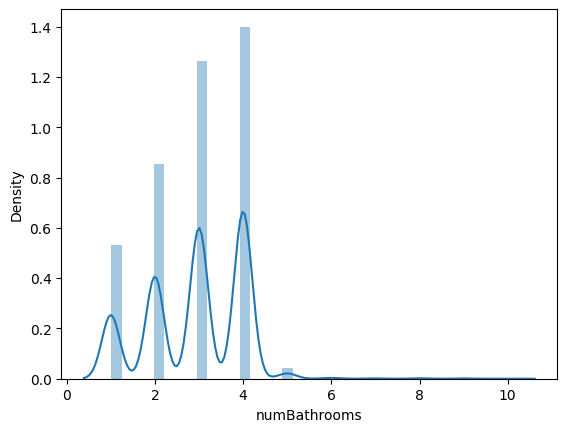

In [271]:
# check missing value
print(data.isnull().sum())
# analyze the missing value column
num_missing_before = data.isnull().sum().numBathrooms
sns.distplot(data['numBathrooms'])
plt.show()

In [272]:
"""fter analyze the distribution of the missing value column
I will drop missing values because this depend on the properties of
the specific kind of house and on price, maybe other criteria and this is
like descrete numbers so I think we should not fill values by mean or mode here 
"""

'fter analyze the distribution of the missing value column\nI will drop missing values because this depend on the properties of\nthe specific kind of house and on price, maybe other criteria and this is\nlike descrete numbers so I think we should not fill values by mean or mode here \n'

In [273]:
mode_numBathrooms = data.numBathrooms.mode()[0]
data.numBathrooms.fillna(mode_numBathrooms, inplace=True)
data.info()
num_missing_after = data.isnull().numBathrooms.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4358 entries, 0 to 4357
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        4358 non-null   object 
 1   house_size        4358 non-null   object 
 2   location          4358 non-null   object 
 3   city              4358 non-null   object 
 4   price             4358 non-null   int64  
 5   numBathrooms      4358 non-null   float64
 6   verificationDate  4358 non-null   object 
 7   SecurityDeposit   4358 non-null   object 
 8   Status            4358 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 306.5+ KB


In [274]:
print("numBathrooms before fill missing values: {}".format(num_missing_before))
print("numBathrooms after fill missing values: {}".format(num_missing_after))

numBathrooms before fill missing values: 25
numBathrooms after fill missing values: 0


## Identify variable

In [275]:
data.columns

Index(['house_type', 'house_size', 'location', 'city', 'price', 'numBathrooms',
       'verificationDate', 'SecurityDeposit', 'Status'],
      dtype='object')

As requirement, predict `price` so
* Output variable: price
* Input variable: 
    * house_type -> category
    * house_size -> numeric (preprocess)
    * location -> category
    * city -> category
    * numBathrooms -> numeric
    * verificationDate -> category (preprocess)
    * SecurityDeposit -> numeric
    * Status -> category

In [276]:
# Preprocessing house_size and convert it to numeric
import re
reg = '[^0-9]'
data.house_size = data.house_size.str.replace(reg, '', regex=True).astype('float')
data.head(5)

,house_type,house_size,location,city,price,numBathrooms,verificationDate,SecurityDeposit,Status
0,1 RK Studio Apartment,400.0,Kalkaji,Delhi,22000,1.0,Posted a day ago,No Deposit,Furnished
1,1 RK Studio Apartment,400.0,Mansarover Garden,Delhi,20000,1.0,Posted 9 days ago,No Deposit,Furnished
2,2 BHK Independent Floor,500.0,Uttam Nagar,Delhi,8500,1.0,Posted 12 days ago,No Deposit,Semi-Furnished
3,3 BHK Independent House,1020.0,Model Town,Delhi,48000,3.0,Posted a year ago,No Deposit,Furnished
4,2 BHK Apartment,810.0,Sector 13 Rohini,Delhi,20000,2.0,Posted a year ago,No Deposit,Unfurnished


In [277]:
# Preprocessing verificationDate and convert it to category
data.verificationDate.unique()

array(['Posted a day ago', 'Posted 9 days ago', 'Posted 12 days ago',
       'Posted a year ago', 'Posted 2 years ago', 'Posted 3 years ago',
       'Posted 2 months ago', 'Posted a month ago', 'Posted 17 days ago',
       'Posted 13 days ago', 'Posted 15 days ago', 'Posted 19 days ago',
       'Posted 16 days ago', 'Posted 6 days ago', 'Posted 9 months ago',
       'Posted 23 days ago', 'Posted 22 days ago', 'Posted 3 days ago',
       'Posted 4 years ago', 'Posted 11 days ago', 'Posted 10 days ago',
       'Posted 14 days ago', 'Posted 5 months ago', 'Posted 18 days ago',
       'Posted 7 days ago', 'Posted 5 days ago', 'Posted 3 months ago',
       'Posted 4 months ago', 'Posted 20 days ago', 'Posted 4 days ago',
       'Posted 24 days ago', 'Posted 6 hours ago', 'Posted 2 days ago',
       'Posted 21 days ago', 'Posted 25 days ago', 'Posted 16 hours ago',
       'Posted 8 days ago', 'Posted 10 months ago', 'Posted 13 hours ago',
       'Posted 14 hours ago', 'Posted 19 hours ago',


In [278]:
def preprocess_date(date : str) -> str:
    list_components = date.split(" ")
    return list_components[1] + " " + list_components[2]


In [279]:
data.verificationDate = data.verificationDate.apply(preprocess_date)

In [280]:
data.head(5)

,house_type,house_size,location,city,price,numBathrooms,verificationDate,SecurityDeposit,Status
0,1 RK Studio Apartment,400.0,Kalkaji,Delhi,22000,1.0,a day,No Deposit,Furnished
1,1 RK Studio Apartment,400.0,Mansarover Garden,Delhi,20000,1.0,9 days,No Deposit,Furnished
2,2 BHK Independent Floor,500.0,Uttam Nagar,Delhi,8500,1.0,12 days,No Deposit,Semi-Furnished
3,3 BHK Independent House,1020.0,Model Town,Delhi,48000,3.0,a year,No Deposit,Furnished
4,2 BHK Apartment,810.0,Sector 13 Rohini,Delhi,20000,2.0,a year,No Deposit,Unfurnished


### Split into numeric and category dataframe to analyze

In [281]:
# Now we should have output, input_numeric, input_category dataframe

In [282]:
num_cols = data.select_dtypes('number').columns
cat_cols = data.select_dtypes('O').columns

In [283]:
output_df = data[['price']]
input_numeric_df = data[num_cols].drop(columns='price', axis=1)
input_category_df = data[cat_cols]

In [284]:
input_category_df.head()

,house_type,location,city,verificationDate,SecurityDeposit,Status
0,1 RK Studio Apartment,Kalkaji,Delhi,a day,No Deposit,Furnished
1,1 RK Studio Apartment,Mansarover Garden,Delhi,9 days,No Deposit,Furnished
2,2 BHK Independent Floor,Uttam Nagar,Delhi,12 days,No Deposit,Semi-Furnished
3,3 BHK Independent House,Model Town,Delhi,a year,No Deposit,Furnished
4,2 BHK Apartment,Sector 13 Rohini,Delhi,a year,No Deposit,Unfurnished


In [285]:
input_numeric_df.head()

,house_size,numBathrooms
0,400.0,1.0
1,400.0,1.0
2,500.0,1.0
3,1020.0,3.0
4,810.0,2.0


## Univariate analysis

### Input Category analysis

In [286]:
cat_cols

Index(['house_type', 'location', 'city', 'verificationDate', 'SecurityDeposit',
       'Status'],
      dtype='object')

Class count of house_type:

house_type
3 BHK Independent Floor      1315
4 BHK Independent Floor       697
2 BHK Independent Floor       467
3 BHK Apartment               289
4 BHK Villa                   236
2 BHK Apartment               203
1 BHK Independent Floor       198
1 BHK Apartment               167
5 BHK Independent Floor       155
5 BHK Villa                   145
5 BHK Independent House       111
4 BHK Independent House       107
1 RK Studio Apartment         105
4 BHK Apartment                99
3 BHK Independent House        18
2 BHK Independent House        17
1 BHK Independent House         6
6 BHK Independent Floor         5
5 BHK Apartment                 5
9 BHK Independent House         3
10 BHK Independent House        2
7 BHK Independent Floor         2
8 BHK Independent Floor         1
8 BHK Independent House         1
8 BHK Villa                     1
7 BHK Independent House         1
6 BHK penthouse                 1
12 BHK Independent House        1
Name: cou

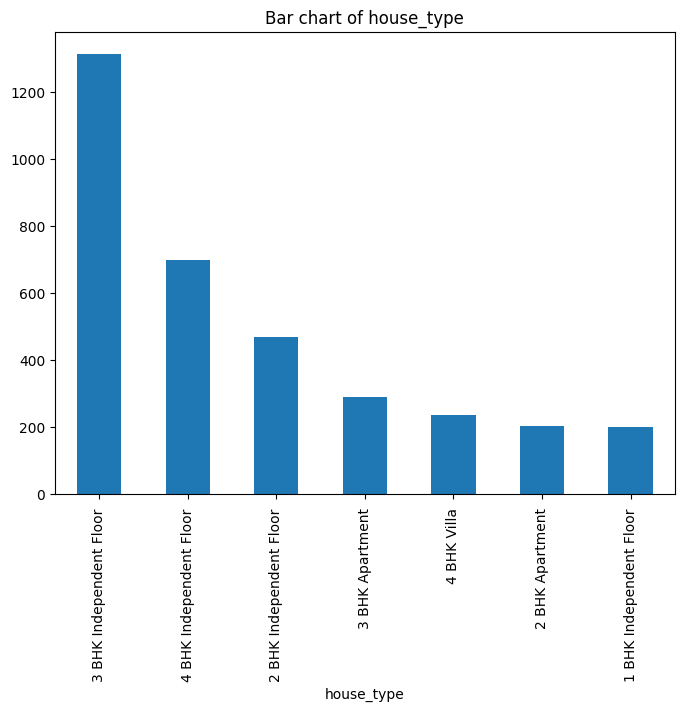

In [287]:
_analyzer.analyze_category_variable('house_type', input_category_df)

What is top house type?
BHK Independent Floor

Class count of location:

location
Defence Colony          158
Greater kailash 1       136
Chattarpur              124
Jor bagh                112
Vasant Vihar            111
                       ... 
Vinod Nagar East          1
Sector 22 Rohini          1
Sheikh Sarai Village      1
Shakurpur Colony          1
Nangloi                   1
Name: count, Length: 288, dtype: int64


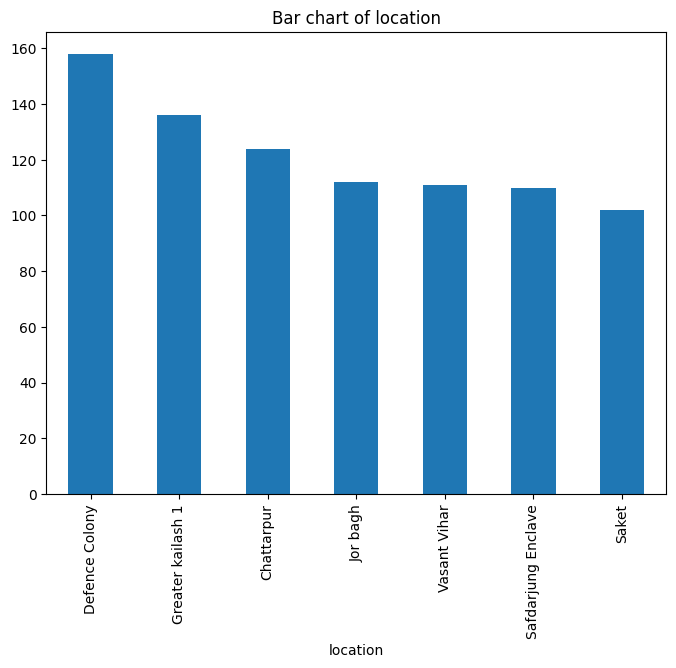

In [288]:
_analyzer.analyze_category_variable('location', input_category_df)

What is top location? Do we need to pre-processing anything else?
Defence Colony. I think no

Class count of city:

city
Delhi    4358
Name: count, dtype: int64


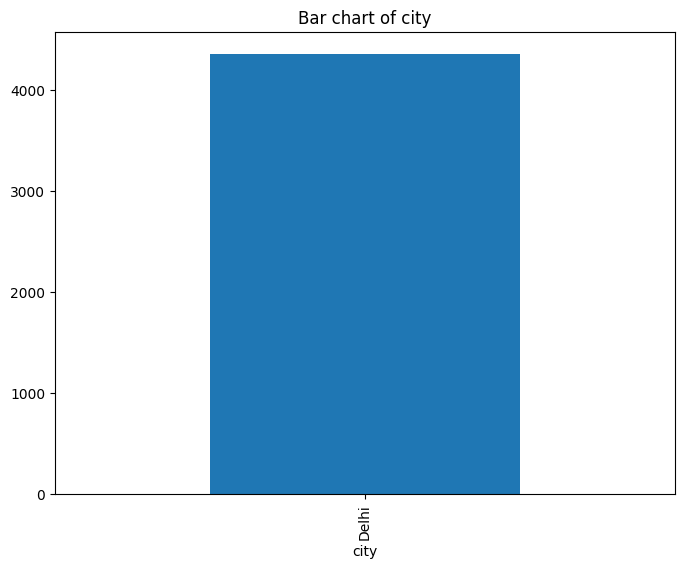

In [289]:
_analyzer.analyze_category_variable('city', input_category_df)

Can we use city for predict price?
In this case, city is not useful because this is survey in just one city

Class count of verificationDate:

verificationDate
a year        1022
5 months       509
3 years        434
2 months       412
6 months       406
a month        323
16 days        270
2 years        102
15 days         87
10 days         63
11 days         57
9 days          57
6 days          46
3 days          46
2 days          42
20 days         41
23 days         39
7 days          37
4 years         36
19 days         34
5 days          34
12 days         32
3 months        30
22 days         24
25 days         22
a day           22
4 days          18
17 days         16
18 days         14
24 days         12
8 days          11
13 days          9
21 days          7
14 days          7
9 months         6
21 hours         4
14 hours         3
9 hours          3
4 months         3
13 hours         3
an hour          2
6 hours          2
37 minutes       2
16 hours         1
17 hours         1
19 hours         1
10 months        1
5 hours          1
2 hours          1
4 hours          1

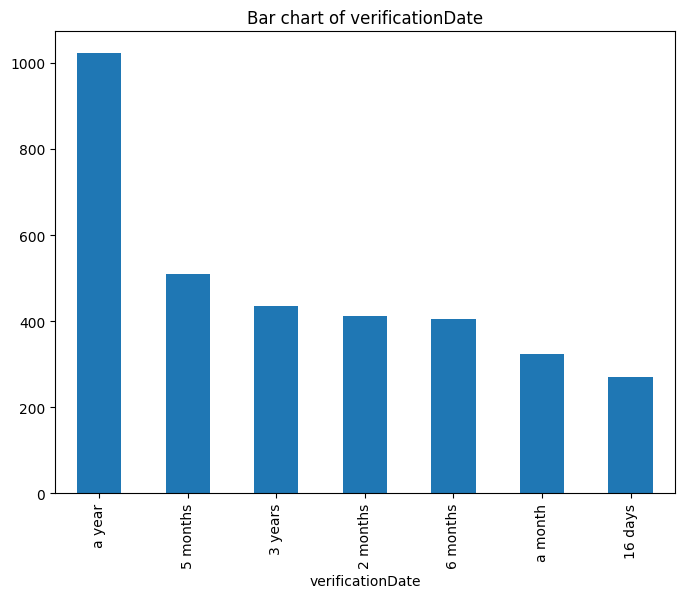

In [290]:
_analyzer.analyze_category_variable('verificationDate', input_category_df)

What is top of verificationDate? Do we need to pre-processing anything else? a year, may be we need a way to encode it like binarizing, deposit yes or no?

Class count of SecurityDeposit:

SecurityDeposit
No Deposit    1926
 10,10,202     188
 10,20,202      66
 18,10,202      61
 10,10,220      56
              ... 
 15,41,815       1
 18,10,002       1
 18,18,184       1
 18,10,281       1
 18,18,108       1
Name: count, Length: 646, dtype: int64


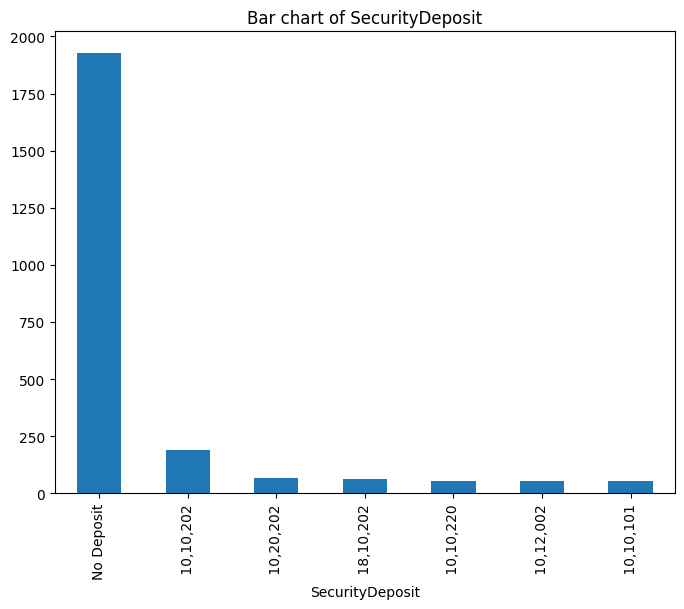

In [291]:
_analyzer.analyze_category_variable('SecurityDeposit', input_category_df)

Can we do somthing with SecurityDeposit? yes, we can convert the style string to standard style displaying numerical , or process No deposit if neccesary

Class count of Status:

Status
Unfurnished       2029
Semi-Furnished    1686
Furnished          643
Name: count, dtype: int64


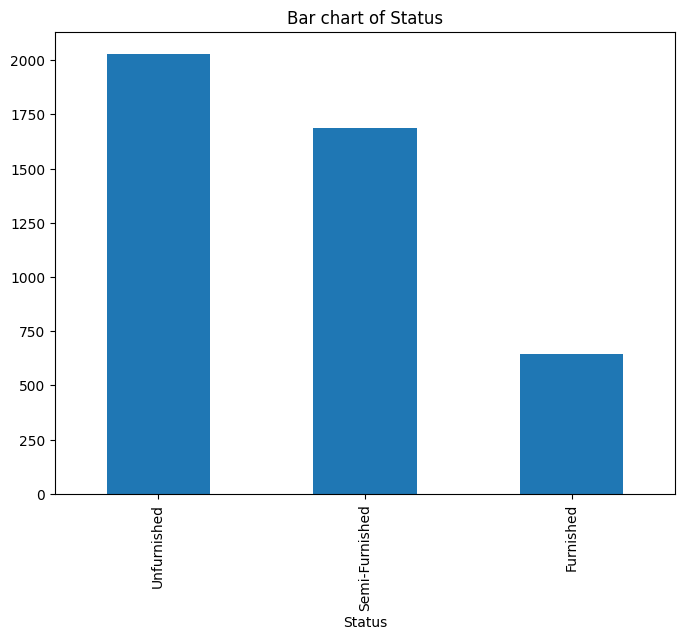

In [292]:
_analyzer.analyze_category_variable('Status', input_category_df)

What is top of Status? unfurnished

### Preprocessing

In [293]:
input_category_df.SecurityDeposit[input_category_df['SecurityDeposit'] == 'No Deposit'] = '0'

In [294]:
input_category_df.SecurityDeposit = input_category_df.SecurityDeposit.str.replace(reg, '', regex=True).astype(float)

In [295]:
input_numeric_df['SecurityDeposit'] = input_category_df.SecurityDeposit

In [296]:
input_category_df.drop(columns=['SecurityDeposit','city'], axis=1, inplace=True)

In [297]:
input_category_df.head(5)

,house_type,location,verificationDate,Status
0,1 RK Studio Apartment,Kalkaji,a day,Furnished
1,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished
2,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished
3,3 BHK Independent House,Model Town,a year,Furnished
4,2 BHK Apartment,Sector 13 Rohini,a year,Unfurnished


In [298]:
input_numeric_df.head(5)

,house_size,numBathrooms,SecurityDeposit
0,400.0,1.0,0.0
1,400.0,1.0,0.0
2,500.0,1.0,0.0
3,1020.0,3.0,0.0
4,810.0,2.0,0.0


### Input Numerical analysis

In [299]:
input_numeric_df.columns

Index(['house_size', 'numBathrooms', 'SecurityDeposit'], dtype='object')

=====
central tendency of house_size: {'mean': np.float64(2980.651675080312), 'median': 2500.0, 'mode': np.float64(5896.0), 'min': 150.0, 'max': 14521.0, 'range': 14371.0}
=====
Dispersion of house_size: 
 {'range': 14371.0, 'q1': np.float64(1050.0), 'q3': np.float64(5891.0), 'iqr': np.float64(4841.0), 'var': 4707389.041827573, 'skew': np.float64(0.5968938000394077), 'kurtosis': np.float64(-0.9571725278673608)}
=====


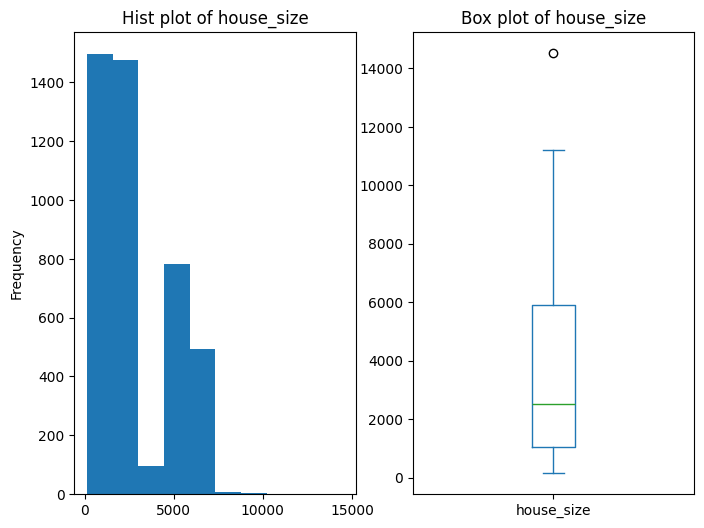

In [300]:
_analyzer.analyze_numeric_variable('house_size', input_numeric_df)

`house_size` have upper outlier, skew right

=====
central tendency of numBathrooms: {'mean': np.float64(2.918999541073887), 'median': 3.0, 'mode': np.float64(4.0), 'min': 1.0, 'max': 10.0, 'range': 9.0}
=====
Dispersion of numBathrooms: 
 {'range': 9.0, 'q1': np.float64(2.0), 'q3': np.float64(4.0), 'iqr': np.float64(2.0), 'var': 1.1880667518932815, 'skew': np.float64(-0.06894263916860525), 'kurtosis': np.float64(0.5702243890208183)}
=====


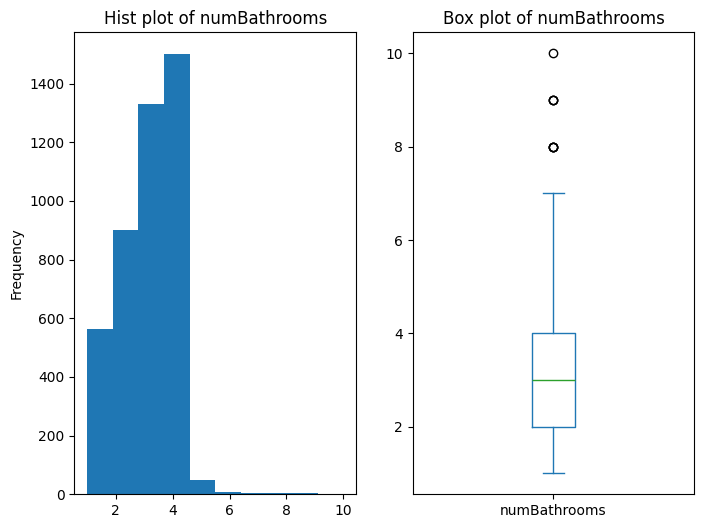

In [301]:
_analyzer.analyze_numeric_variable('numBathrooms', input_numeric_df)

`numBathrooms` have right skew, have upper outlier

=====
central tendency of SecurityDeposit: {'mean': np.float64(640785.0100963744), 'median': 36000.0, 'mode': np.float64(0.0), 'min': 0.0, 'max': 11401010.0, 'range': 11401010.0}
=====
Dispersion of SecurityDeposit: 
 {'range': 11401010.0, 'q1': np.float64(0.0), 'q3': np.float64(1012002.0), 'iqr': np.float64(1012002.0), 'var': 941866409926.241, 'skew': np.float64(2.5317494444482156), 'kurtosis': np.float64(10.524419426023552)}
=====


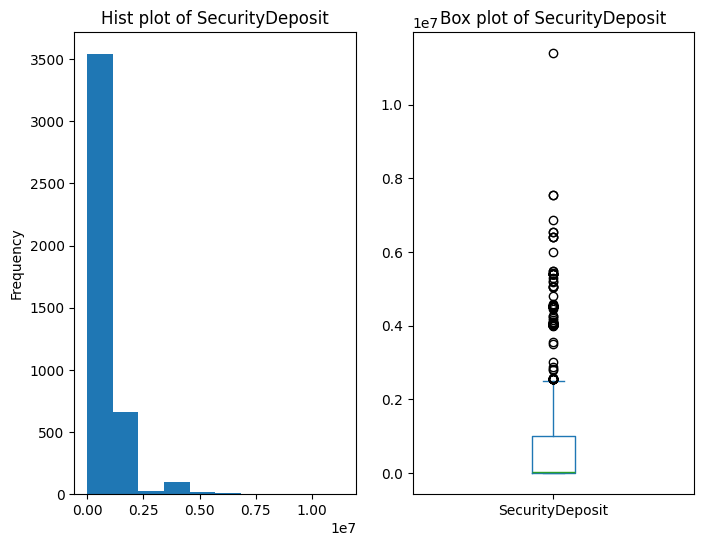

In [302]:
_analyzer.analyze_numeric_variable('SecurityDeposit', input_numeric_df)

`SecurityDeposit` have many upper outlier, right skew

### Output Numerical analysis

=====
central tendency of price: {'mean': np.float64(218557.1727856815), 'median': 125000.0, 'mode': np.int64(301012), 'min': 3000, 'max': 3010101, 'range': 3007101}
=====
Dispersion of price: 
 {'range': 3007101, 'q1': np.float64(28000.0), 'q3': np.float64(301102.0), 'iqr': np.float64(273102.0), 'var': 72841174912.72813, 'skew': np.float64(2.9627465675445785), 'kurtosis': np.float64(13.874571336493755)}
=====


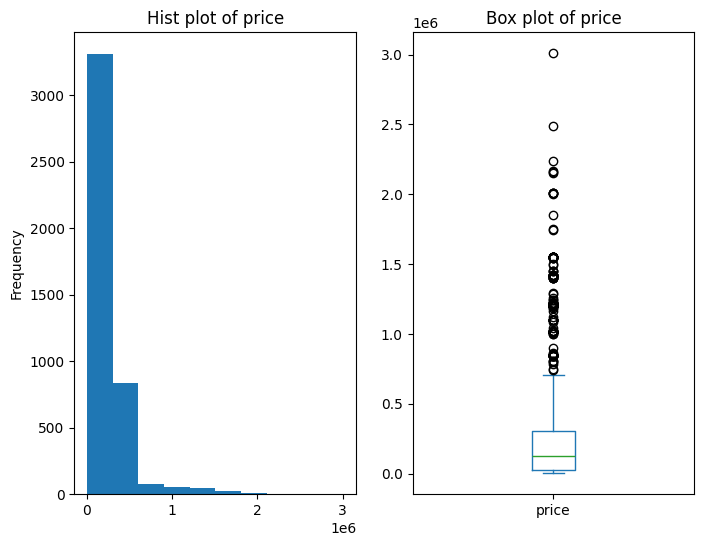

In [303]:
_analyzer.analyze_numeric_variable('price', output_df)

`price` have many upper outlier, right skew

## Bi-variate analysis

### Note: the numBathrooms columns maybe a little different because I fill with mode, the most popular instead of mean

### Handle uncommon category

In [304]:
_processor.handle_uncommon_category('house_type', df=input_category_df)

Before group uncommon category to Rare 
: house_type
3 BHK Independent Floor      1315
4 BHK Independent Floor       697
2 BHK Independent Floor       467
3 BHK Apartment               289
4 BHK Villa                   236
2 BHK Apartment               203
1 BHK Independent Floor       198
1 BHK Apartment               167
5 BHK Independent Floor       155
5 BHK Villa                   145
5 BHK Independent House       111
4 BHK Independent House       107
1 RK Studio Apartment         105
4 BHK Apartment                99
3 BHK Independent House        18
2 BHK Independent House        17
1 BHK Independent House         6
6 BHK Independent Floor         5
5 BHK Apartment                 5
9 BHK Independent House         3
10 BHK Independent House        2
7 BHK Independent Floor         2
8 BHK Independent Floor         1
8 BHK Independent House         1
8 BHK Villa                     1
7 BHK Independent House         1
6 BHK penthouse                 1
12 BHK Independent House     

In [305]:
_processor.handle_uncommon_category('location', df=input_category_df, threshold=5)

Before group uncommon category to Rare 
: location
Defence Colony          158
Greater kailash 1       136
Chattarpur              124
Jor bagh                112
Vasant Vihar            111
                       ... 
Vinod Nagar East          1
Sector 22 Rohini          1
Sheikh Sarai Village      1
Shakurpur Colony          1
Nangloi                   1
Name: count, Length: 288, dtype: int64
After group uncommon category to Rare 
: location
Rare                  298
Defence Colony        158
Greater kailash 1     136
Chattarpur            124
Jor bagh              112
                     ... 
Jangpura Extension      6
Sector-7 Rohini         5
Manglapuri              5
Punjabi Bagh            5
Connaught Place         5
Name: count, Length: 113, dtype: int64


In [306]:
_processor.handle_uncommon_category('verificationDate', df=input_category_df)

Before group uncommon category to Rare 
: verificationDate
a year        1022
5 months       509
3 years        434
2 months       412
6 months       406
a month        323
16 days        270
2 years        102
15 days         87
10 days         63
11 days         57
9 days          57
6 days          46
3 days          46
2 days          42
20 days         41
23 days         39
7 days          37
4 years         36
19 days         34
5 days          34
12 days         32
3 months        30
22 days         24
25 days         22
a day           22
4 days          18
17 days         16
18 days         14
24 days         12
8 days          11
13 days          9
21 days          7
14 days          7
9 months         6
21 hours         4
14 hours         3
9 hours          3
4 months         3
13 hours         3
an hour          2
6 hours          2
37 minutes       2
16 hours         1
17 hours         1
19 hours         1
10 months        1
5 hours          1
2 hours          1
4 hours   

### Continuous vs Continuous (Input and Output)

In [307]:
df = pd.concat([input_numeric_df, output_df], axis=1)
df.corr()

,house_size,numBathrooms,SecurityDeposit,price
house_size,1.000000,0.830311,0.696463,0.734709
numBathrooms,0.830311,1.000000,0.505861,0.597440
SecurityDeposit,0.696463,0.505861,1.000000,0.921409
price,0.734709,0.597440,0.921409,1.000000


`house_size`, `SecurityDeposit`, `numBathrooms` have correlation with `price`

### Input Category vs Input Category 

In [308]:
pairs = _analyzer.create_unique_pair_variable(input_category_df)
pairs

[{'house_type', 'location'},
 {'house_type', 'verificationDate'},
 {'Status', 'house_type'},
 {'location', 'verificationDate'},
 {'Status', 'location'},
 {'Status', 'verificationDate'}]

=====Analyze of house_type and location=====


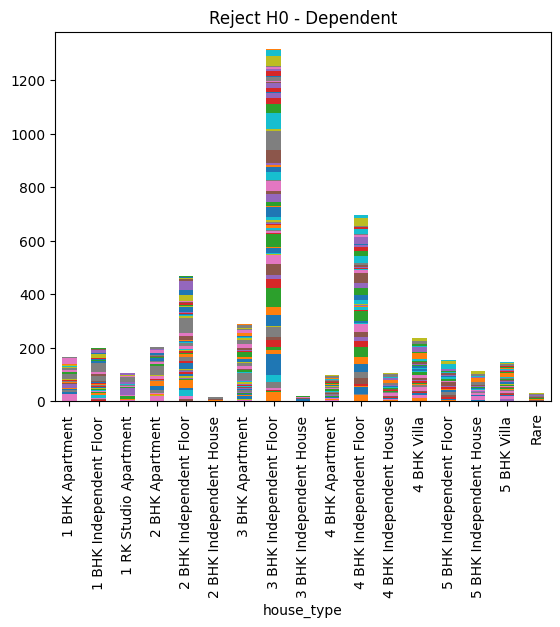

=====Analyze of verificationDate and house_type=====


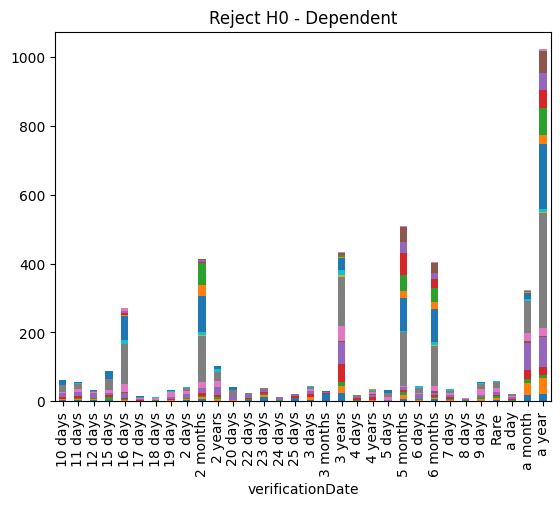

=====Analyze of house_type and Status=====


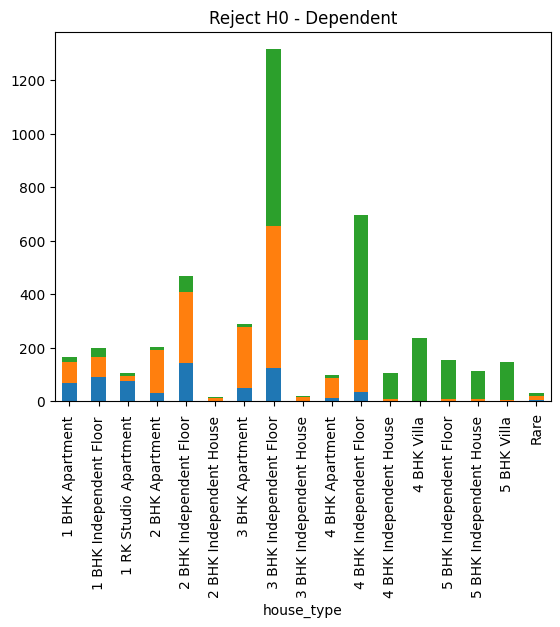

=====Analyze of verificationDate and location=====


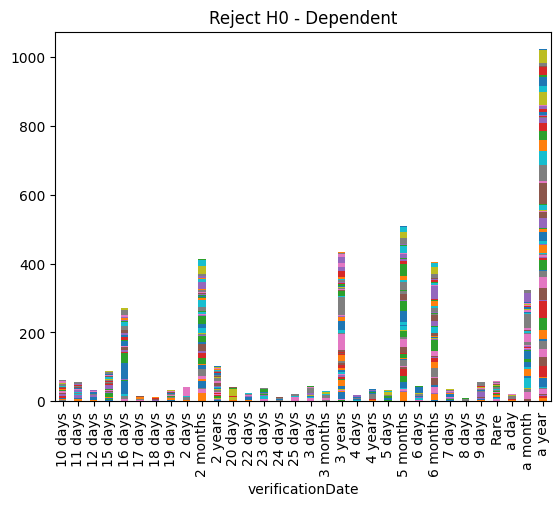

=====Analyze of Status and location=====


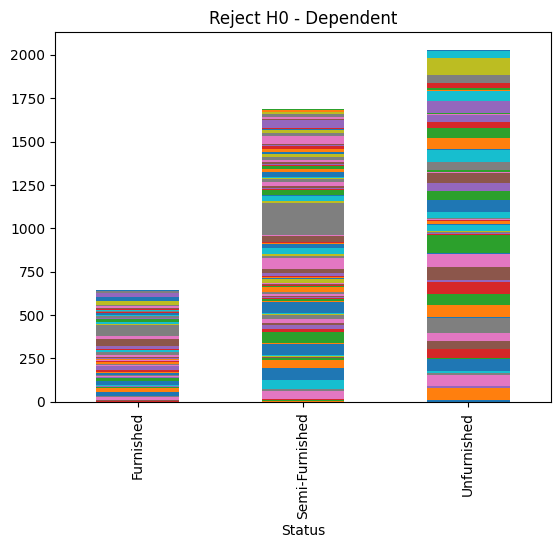

=====Analyze of verificationDate and Status=====


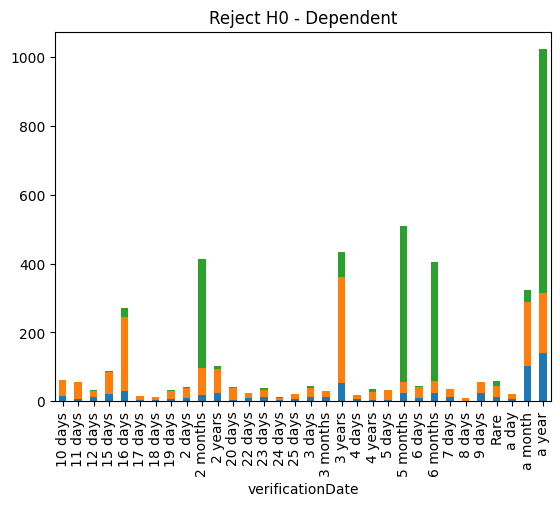

In [309]:
results = []
for pair in pairs:
    pair = list(pair)
    results.append(_analyzer.analyze_category_vs_category(pair[1], pair[0], input_category_df))

In [310]:
pd.DataFrame(results)

,var1,var2,result
0,house_type,location,Reject H0 - Dependent
1,verificationDate,house_type,Reject H0 - Dependent
2,house_type,Status,Reject H0 - Dependent
3,verificationDate,location,Reject H0 - Dependent
4,Status,location,Reject H0 - Dependent
5,verificationDate,Status,Reject H0 - Dependent


* Seem that all category variable have relation with others

### Output Continuous vs Input Category 

In [311]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [312]:
df_temp = pd.concat([input_category_df, output_df], axis=1)
df_temp.head(5)

,house_type,location,verificationDate,Status,price
0,1 RK Studio Apartment,Kalkaji,a day,Furnished,22000
1,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished,20000
2,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished,8500
3,3 BHK Independent House,Model Town,a year,Furnished,48000
4,2 BHK Apartment,Rare,a year,Unfurnished,20000


In [313]:
input_category_df.columns

Index(['house_type', 'location', 'verificationDate', 'Status'], dtype='object')

In [314]:
df_temp.dtypes

house_type          object
location            object
verificationDate    object
Status              object
price                int64
dtype: object

                     sum_sq      df           F  PR(>F)
C(house_type)  1.756874e+14    16.0  336.431814     0.0
Residual       1.416816e+14  4341.0         NaN     NaN


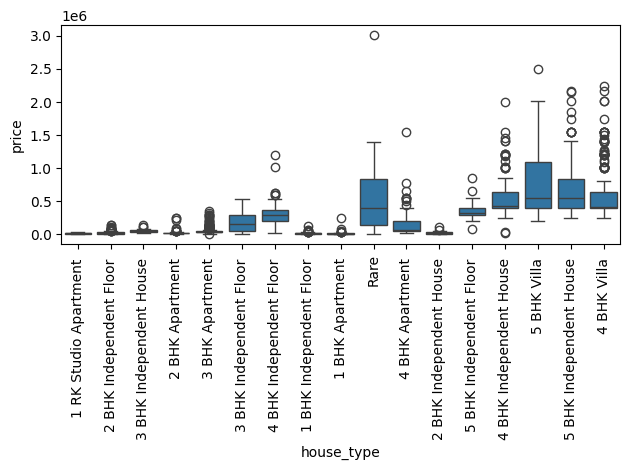

In [315]:
# formula = 'price ~ C(house_type)'
# model = ols(formula, df_temp).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table
_analyzer.analyze_anova_table_for_continous_vs_categories('price', 'house_type', df_temp)
sns.boxplot(data=df_temp, x='house_type', y='price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

                   sum_sq      df          F  PR(>F)
C(location)  1.965878e+14   112.0  61.690315     0.0
Residual     1.207812e+14  4245.0        NaN     NaN


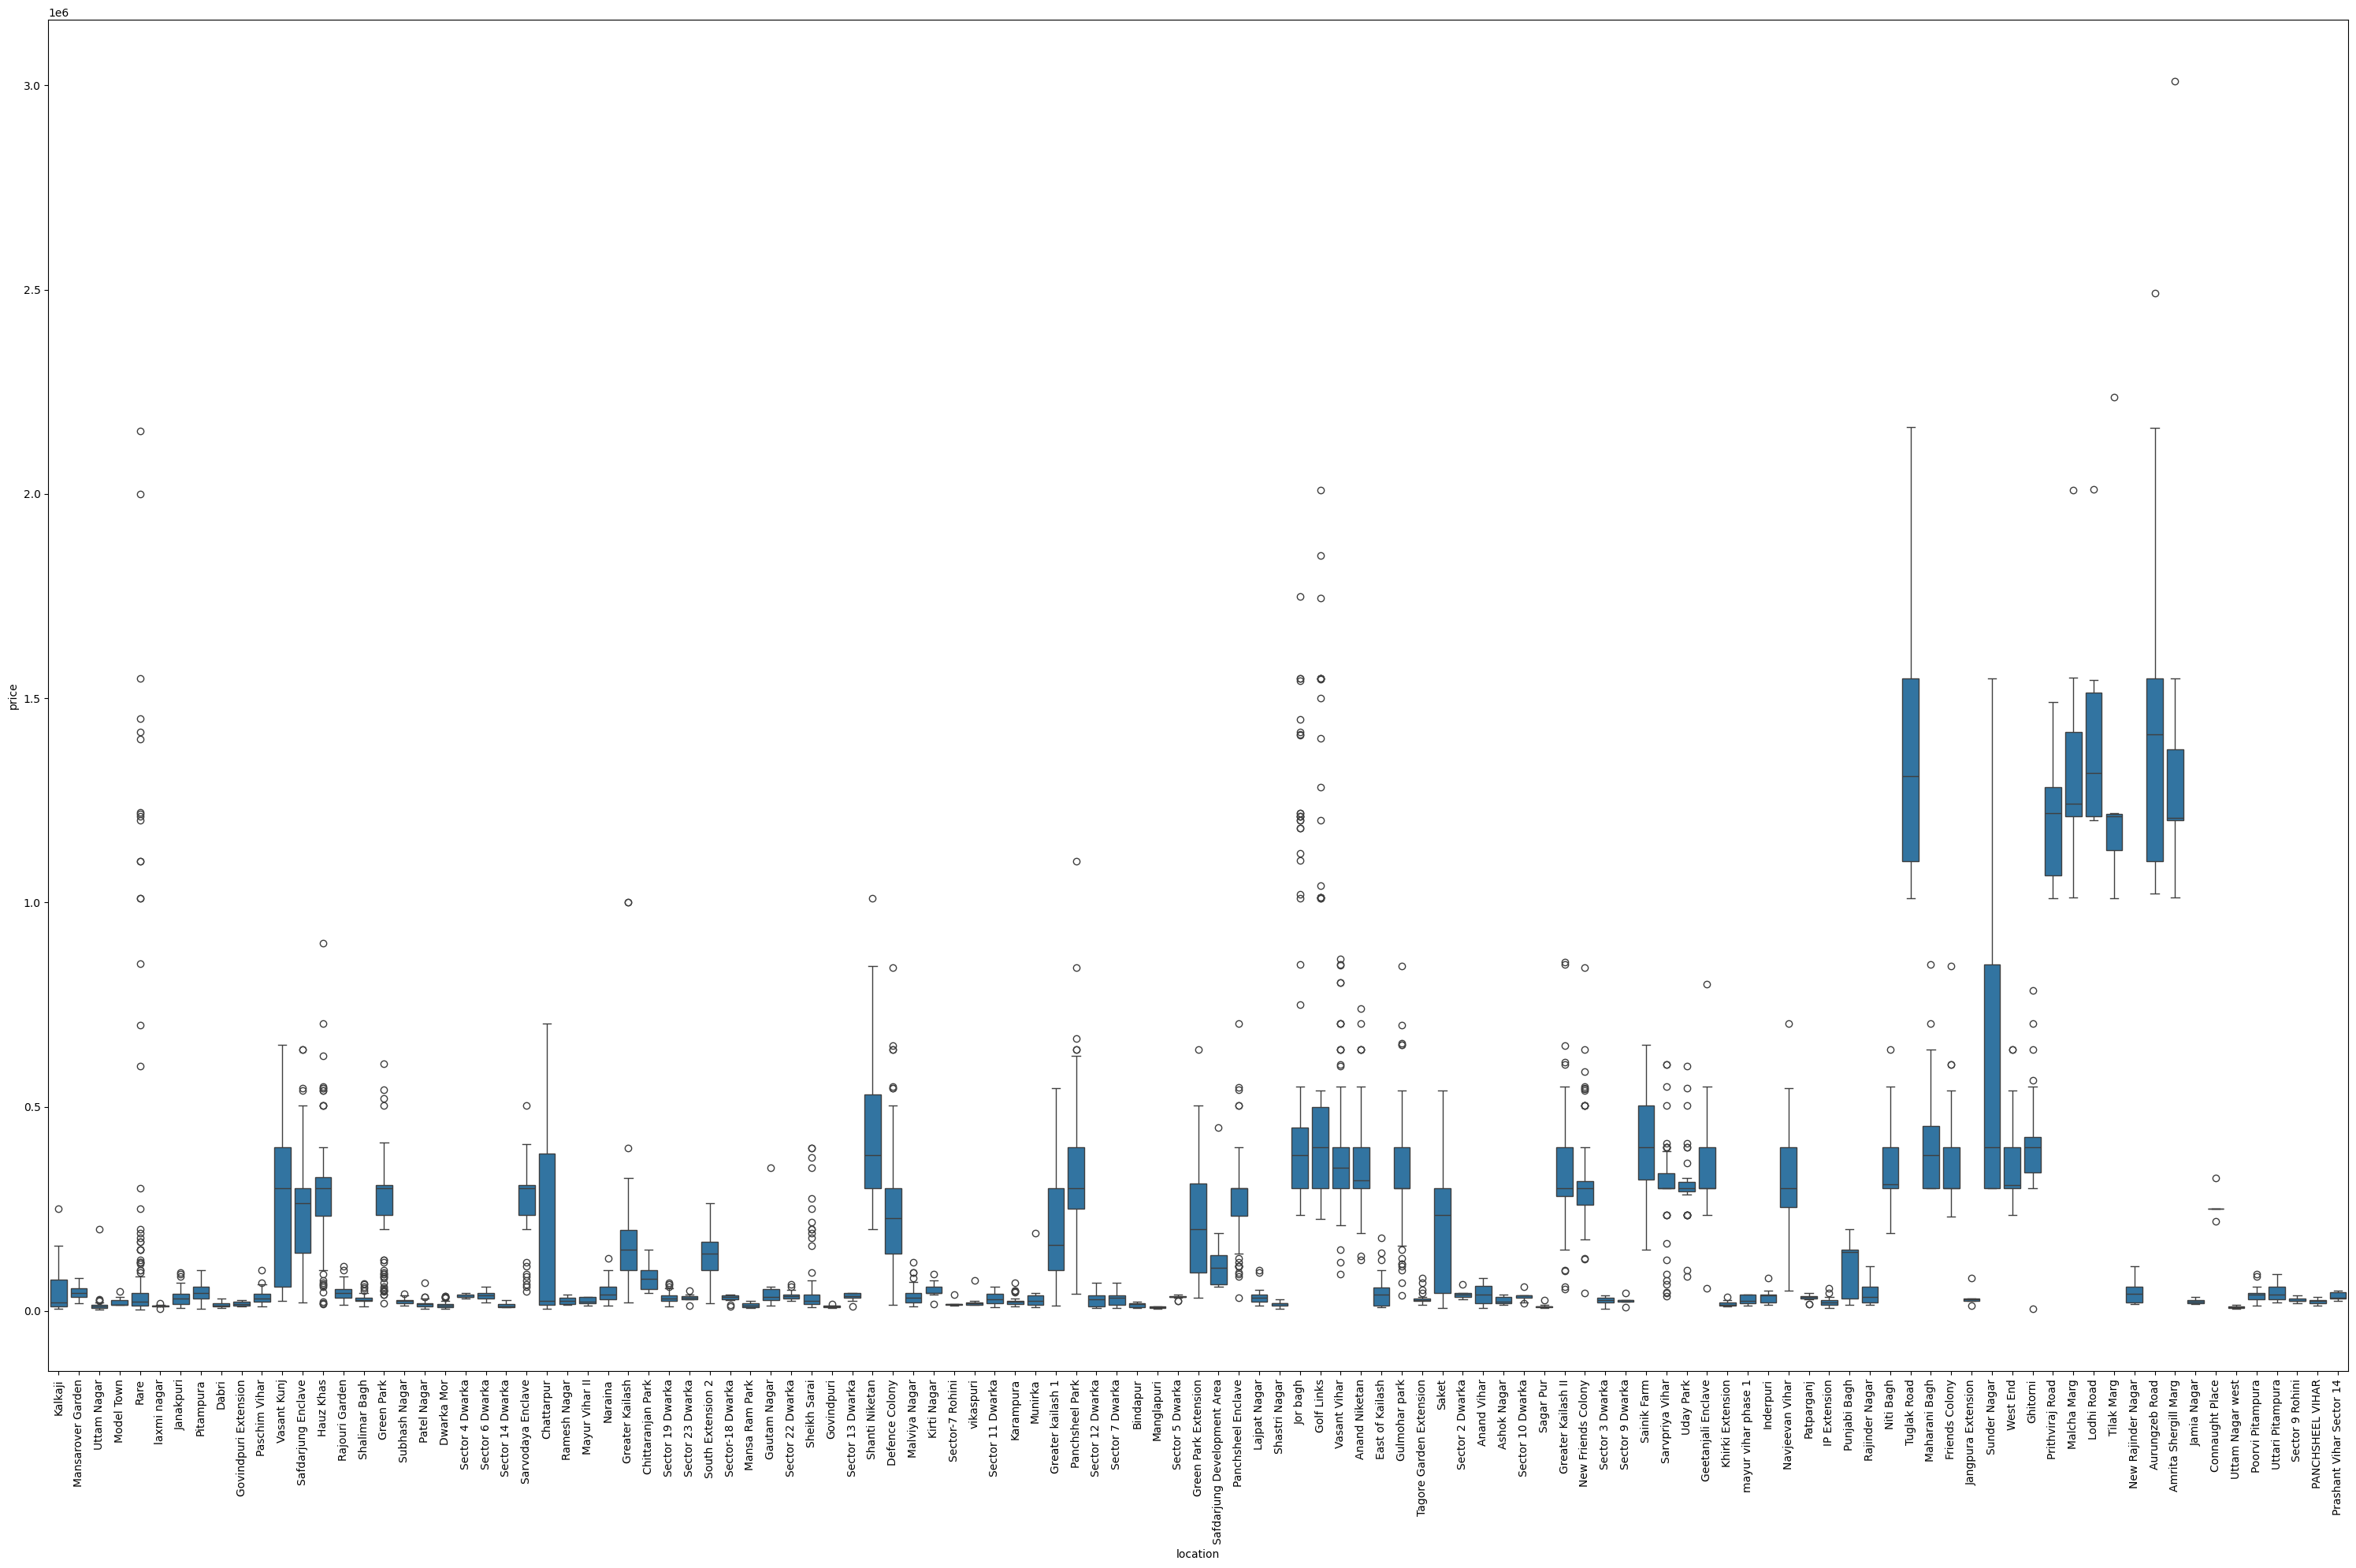

In [316]:
_analyzer.analyze_anova_table_for_continous_vs_categories('price', 'location', df_temp)
plt.figure(figsize=(30,20))
sns.boxplot(data=df_temp, x='location', y='price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

                           sum_sq      df          F         PR(>F)
C(verificationDate)  8.391839e+13    31.0  50.163402  1.021348e-260
Residual             2.334506e+14  4326.0        NaN            NaN


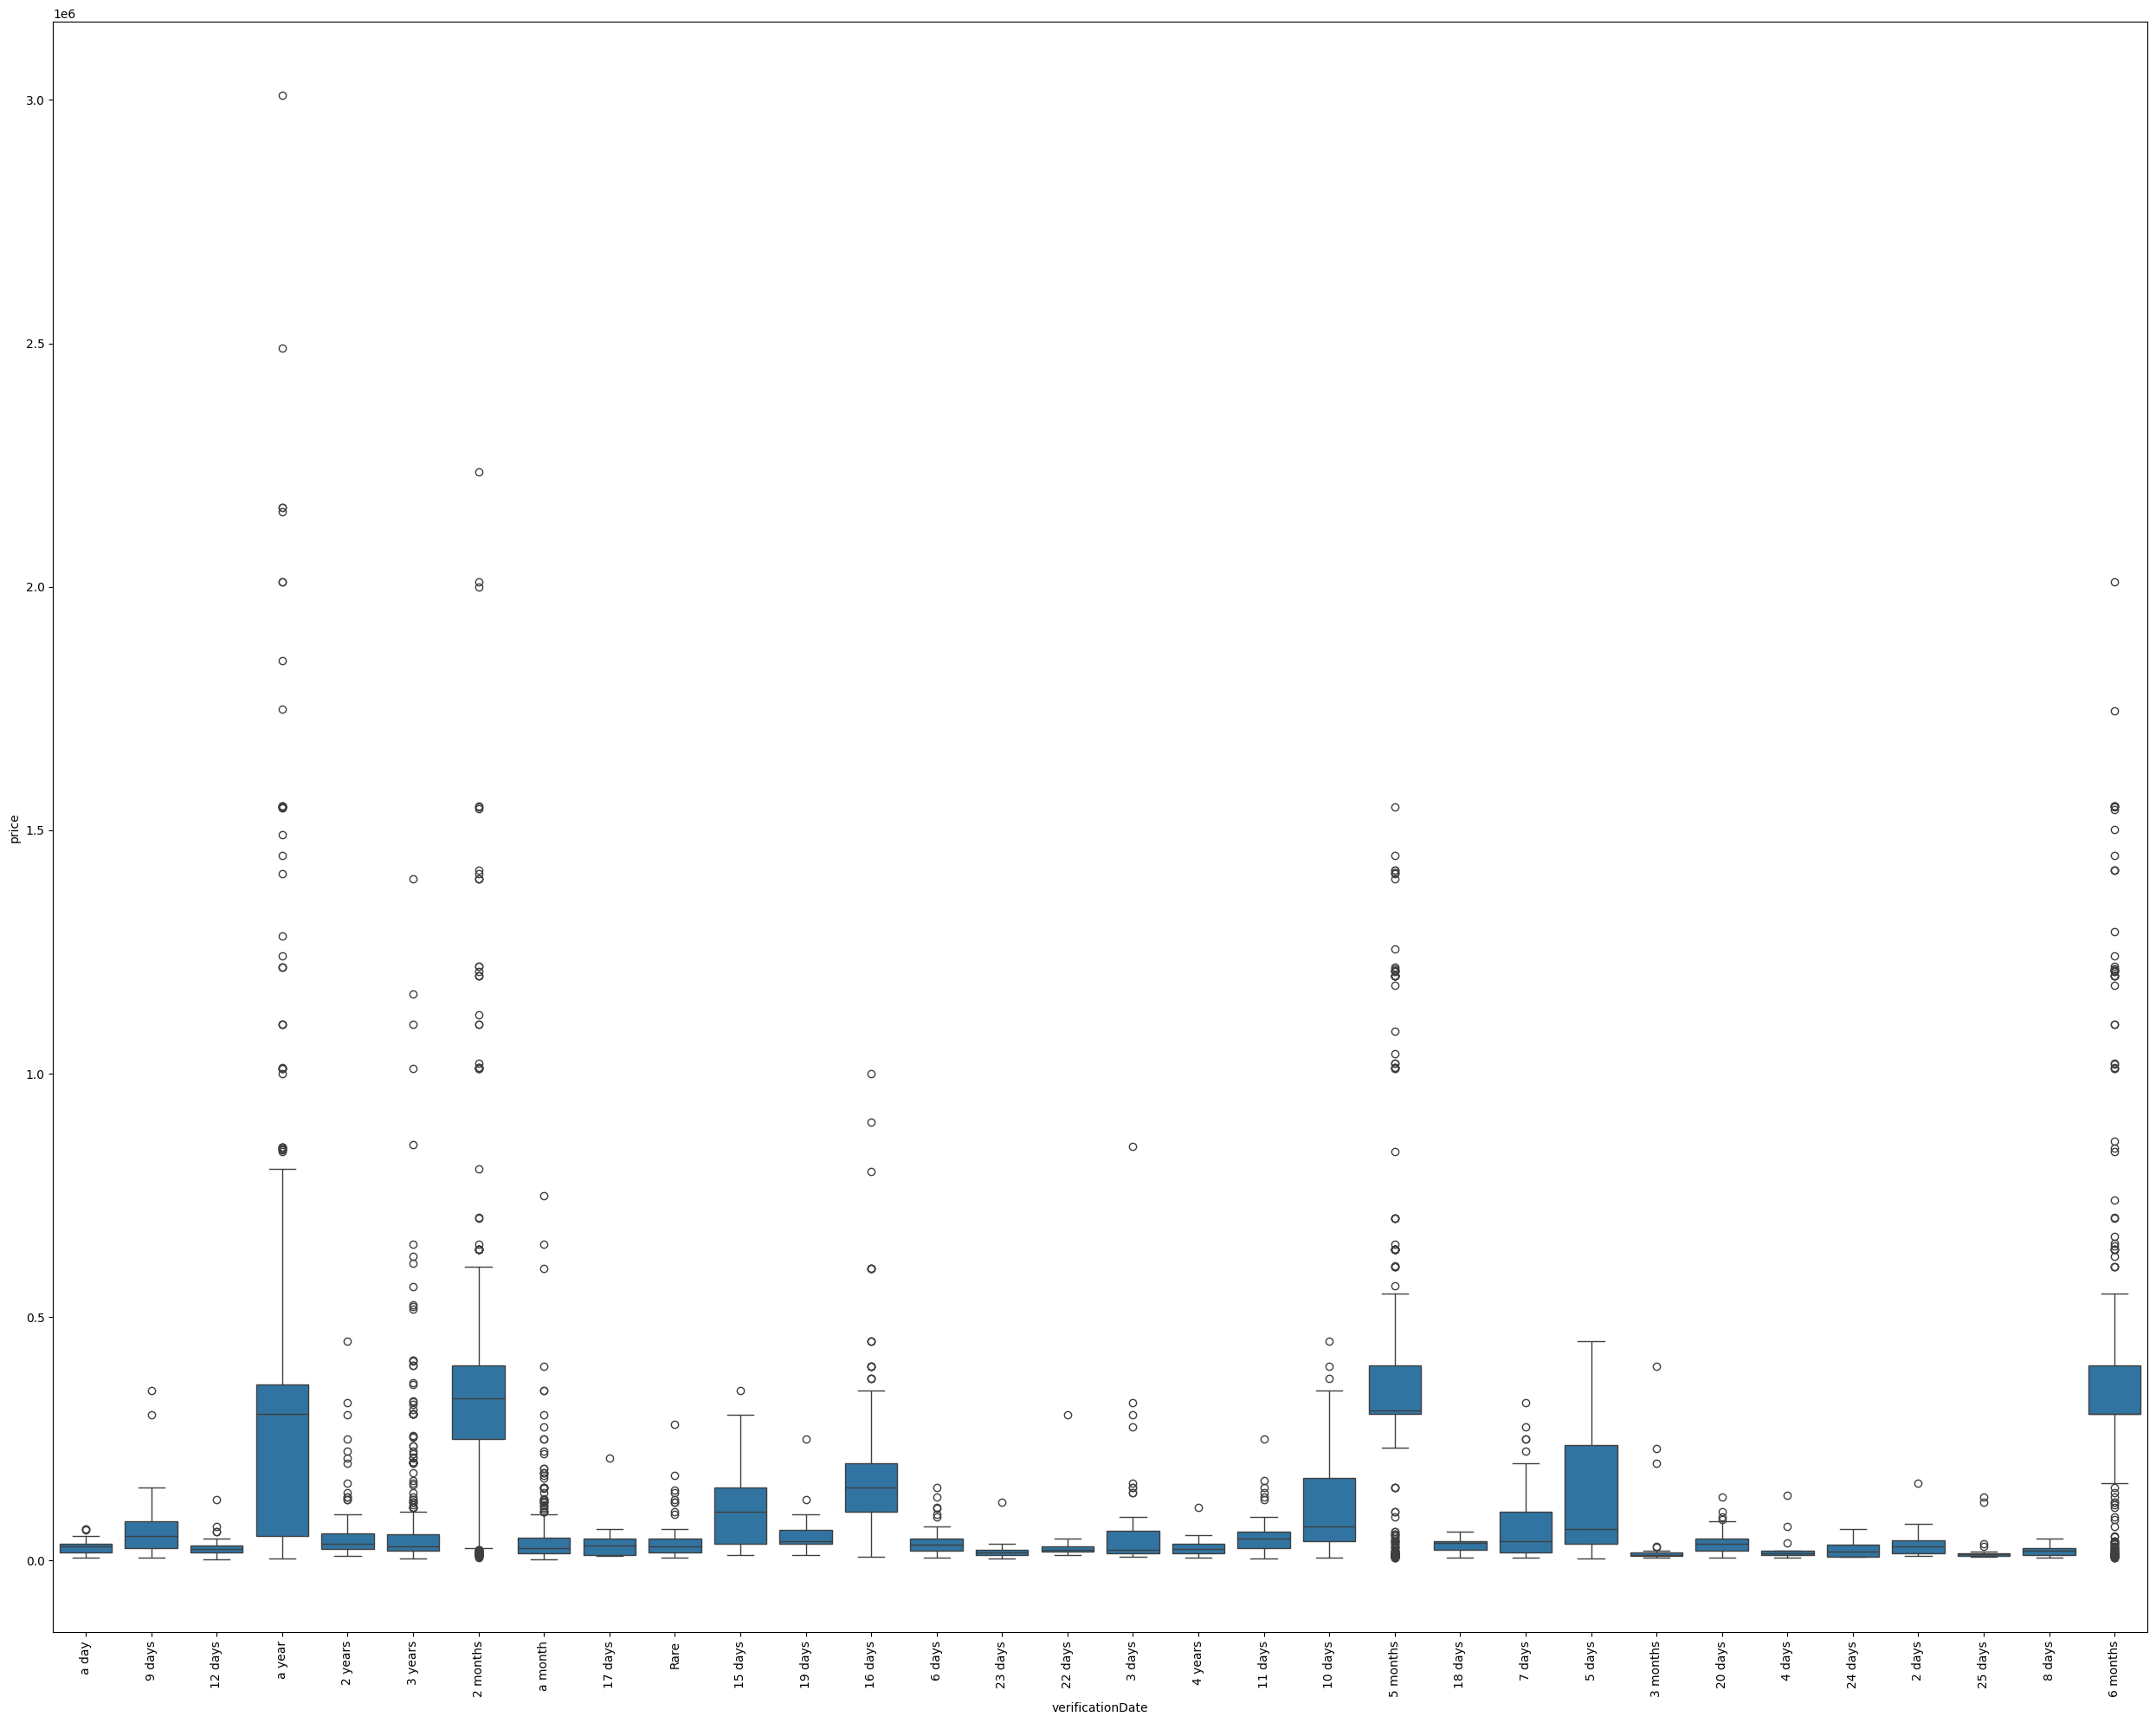

In [317]:
_analyzer.analyze_anova_table_for_continous_vs_categories('price', 'verificationDate', df_temp)
plt.figure(figsize=(25,20))
sns.boxplot(data=df_temp, x='verificationDate', y='price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

                 sum_sq      df            F  PR(>F)
C(Status)  1.111686e+14     2.0  1173.953033     0.0
Residual   2.062004e+14  4355.0          NaN     NaN


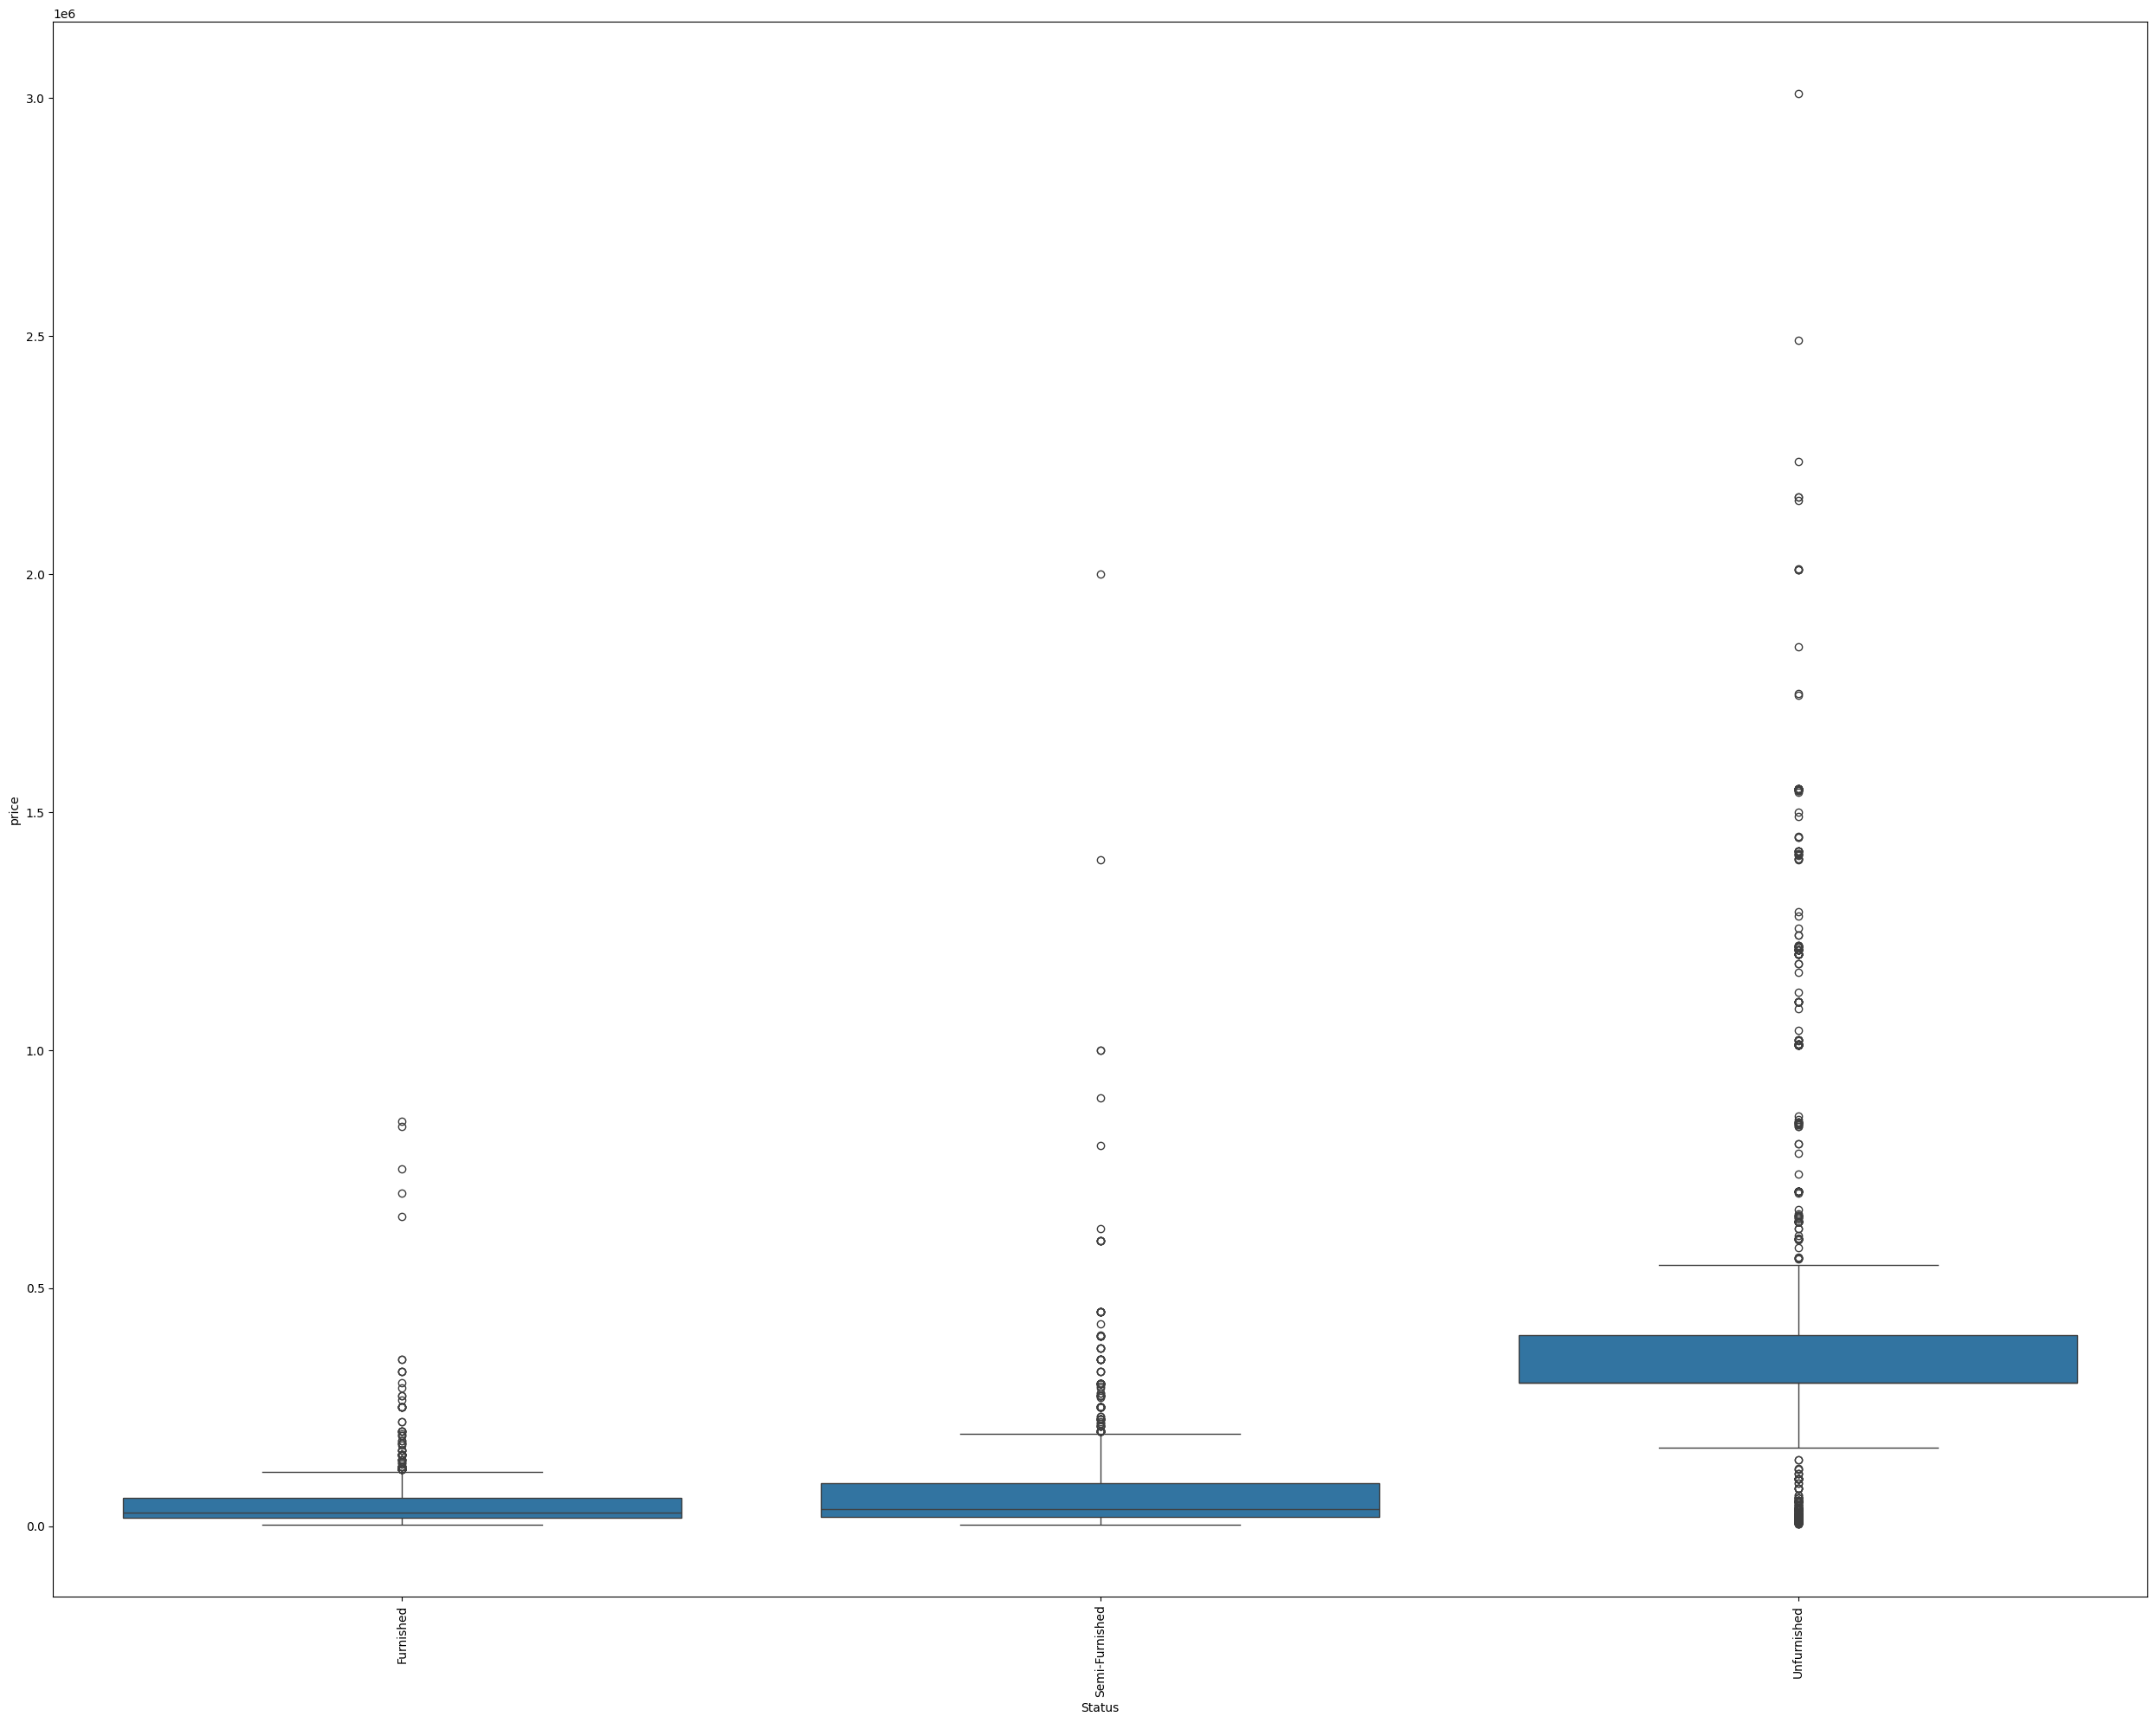

In [318]:
_analyzer.analyze_anova_table_for_continous_vs_categories('price', 'Status', df_temp)
plt.figure(figsize=(25,20))
sns.boxplot(data=df_temp, x='Status', y='price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Most of input category have no relation with output numeric, only `verificationDate` have relation

### Input Category vs Input Continuous 

In [319]:
lst_numeric_cols = list(input_numeric_df.columns)
lst_numeric_cols

['house_size', 'numBathrooms', 'SecurityDeposit']

In [320]:
lst_category_cols = list(input_category_df.columns)
lst_category_cols

['house_type', 'location', 'verificationDate', 'Status']

In [321]:
df_temp = pd.concat([input_numeric_df, input_category_df], axis=1)

In [322]:
df_temp.head()

,house_size,numBathrooms,SecurityDeposit,house_type,location,verificationDate,Status
0,400.0,1.0,0.0,1 RK Studio Apartment,Kalkaji,a day,Furnished
1,400.0,1.0,0.0,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished
2,500.0,1.0,0.0,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished
3,1020.0,3.0,0.0,3 BHK Independent House,Model Town,a year,Furnished
4,810.0,2.0,0.0,2 BHK Apartment,Rare,a year,Unfurnished


                     sum_sq      df            F  PR(>F)
C(house_type)  1.740204e+10    16.0  1519.083772     0.0
Residual       3.108052e+09  4341.0          NaN     NaN


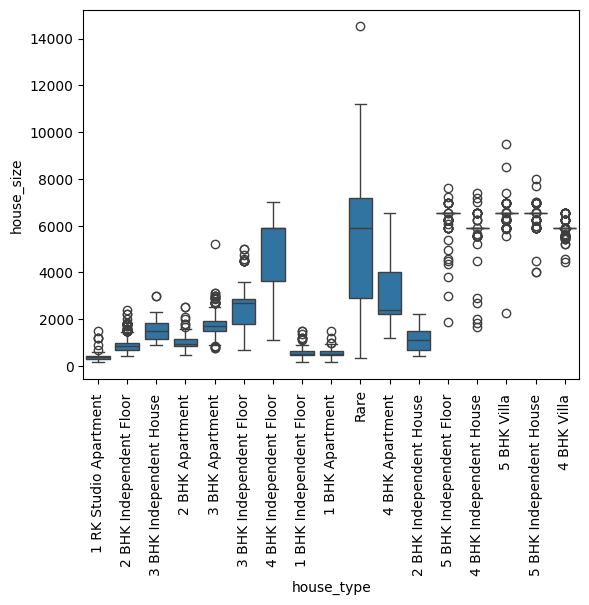

                    sum_sq      df            F  PR(>F)
C(house_type)  4248.366816    16.0  1242.010037     0.0
Residual        928.040022  4341.0          NaN     NaN


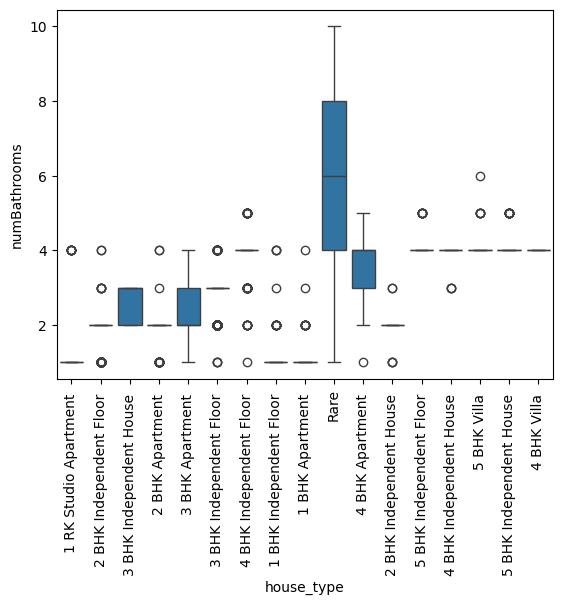

                     sum_sq      df           F  PR(>F)
C(house_type)  1.902430e+15    16.0  234.478358     0.0
Residual       2.201282e+15  4341.0         NaN     NaN


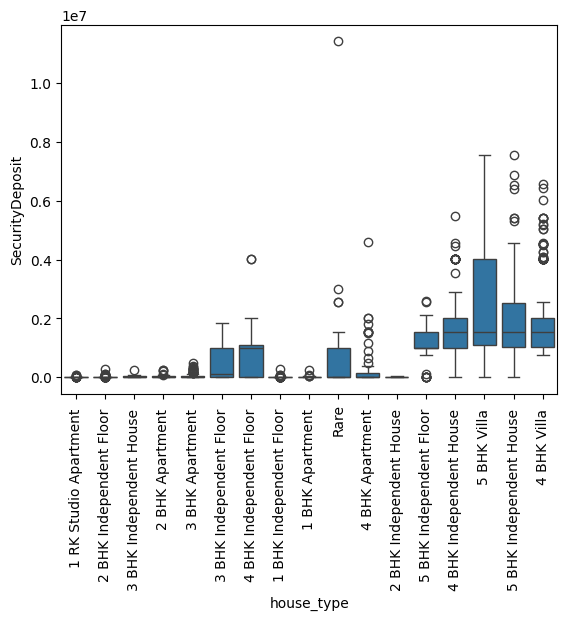

In [323]:
for col in lst_numeric_cols:
    _analyzer.analyze_anova_table_for_continous_vs_categories(col, 'house_type', df_temp)
    sns.boxplot(data=df_temp, x='house_type', y=col)
    plt.xticks(rotation=90)
    plt.show()

                   sum_sq      df          F  PR(>F)
C(location)  1.188977e+10   112.0  52.276875     0.0
Residual     8.620323e+09  4245.0        NaN     NaN


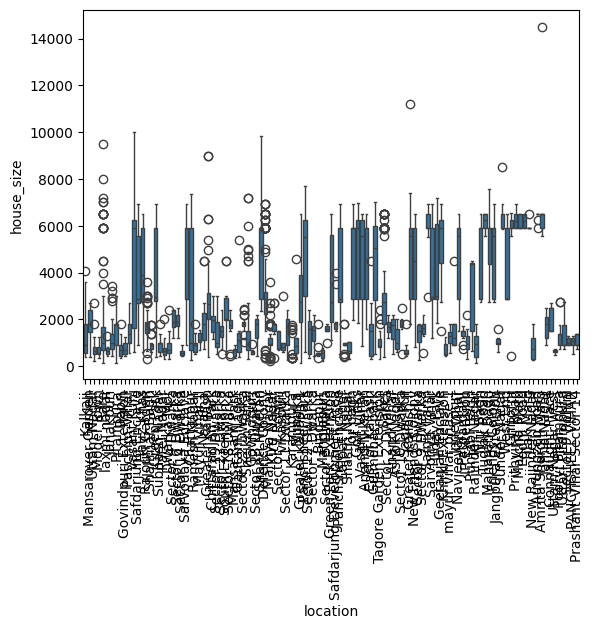

                  sum_sq      df          F  PR(>F)
C(location)  2526.587840   112.0  36.139144     0.0
Residual     2649.818998  4245.0        NaN     NaN


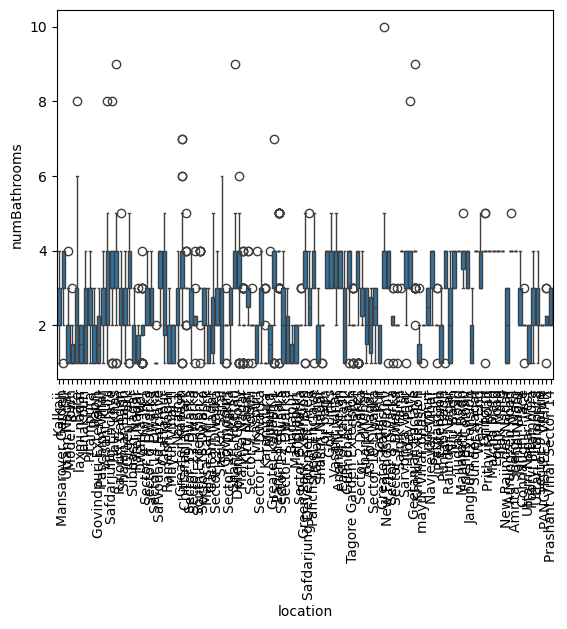

                   sum_sq      df          F  PR(>F)
C(location)  2.499169e+15   112.0  59.034244     0.0
Residual     1.604543e+15  4245.0        NaN     NaN


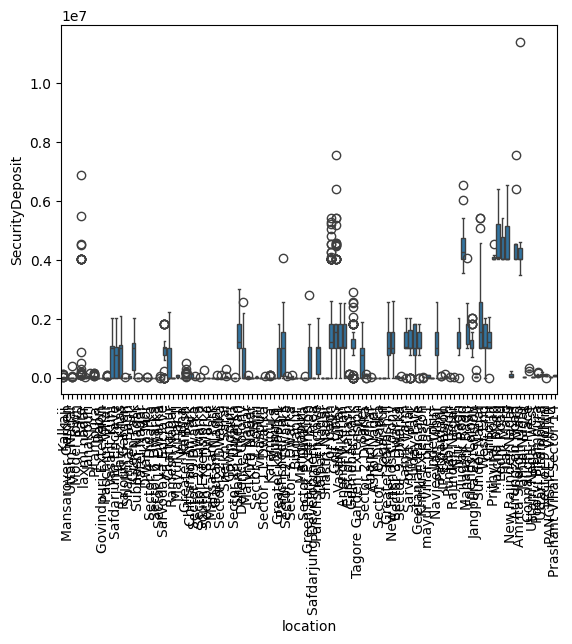

In [324]:
for col in lst_numeric_cols:
    _analyzer.analyze_anova_table_for_continous_vs_categories(col, 'location', df_temp)
    sns.boxplot(data=df_temp, x='location', y=col)
    plt.xticks(rotation=90)
    plt.show()

                           sum_sq      df          F  PR(>F)
C(verificationDate)  7.359565e+09    31.0  78.096893     0.0
Residual             1.315053e+10  4326.0        NaN     NaN


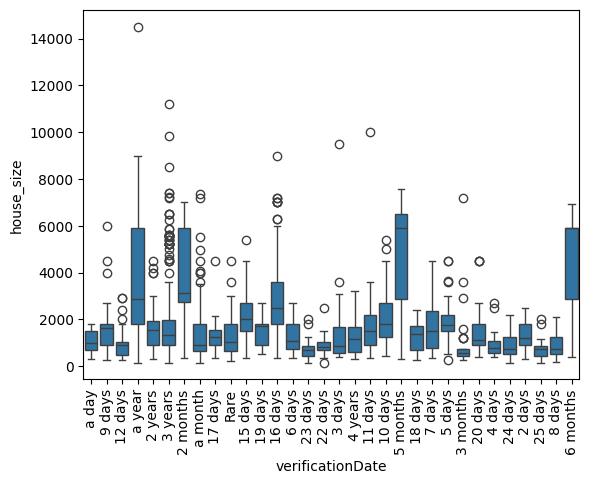

                          sum_sq      df          F         PR(>F)
C(verificationDate)  1306.425899    31.0  47.108663  9.231317e-246
Residual             3869.980939  4326.0        NaN            NaN


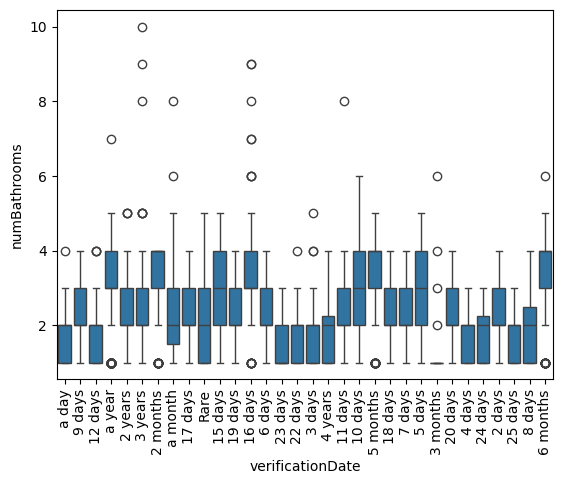

                           sum_sq      df          F  PR(>F)
C(verificationDate)  1.462305e+15    31.0  77.255146     0.0
Residual             2.641407e+15  4326.0        NaN     NaN


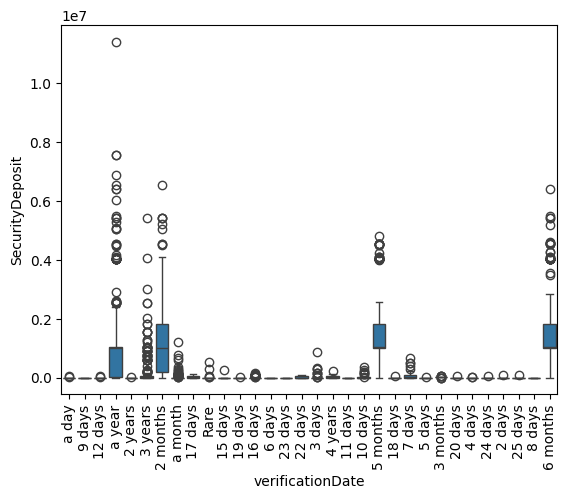

In [325]:
for col in lst_numeric_cols:
    _analyzer.analyze_anova_table_for_continous_vs_categories(col, 'verificationDate', df_temp)
    sns.boxplot(data=df_temp, x='verificationDate', y=col)
    plt.xticks(rotation=90)
    plt.show()

                 sum_sq      df            F  PR(>F)
C(Status)  9.820374e+09     2.0  2000.413933     0.0
Residual   1.068972e+10  4355.0          NaN     NaN


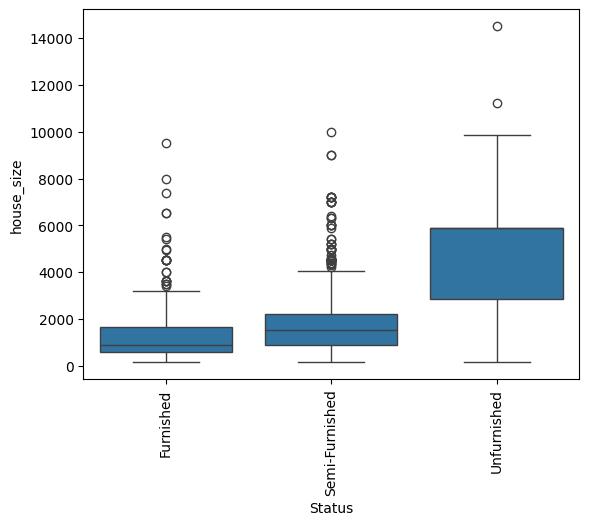

                sum_sq      df           F         PR(>F)
C(Status)  1356.686767     2.0  773.403647  3.774204e-288
Residual   3819.720071  4355.0         NaN            NaN


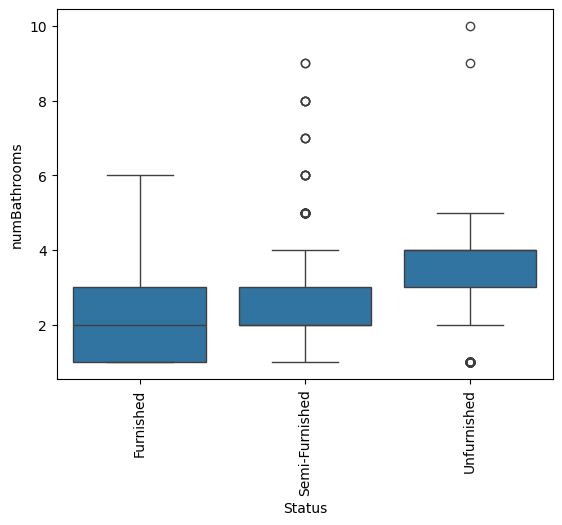

                 sum_sq      df            F  PR(>F)
C(Status)  1.915856e+15     2.0  1906.787088     0.0
Residual   2.187856e+15  4355.0          NaN     NaN


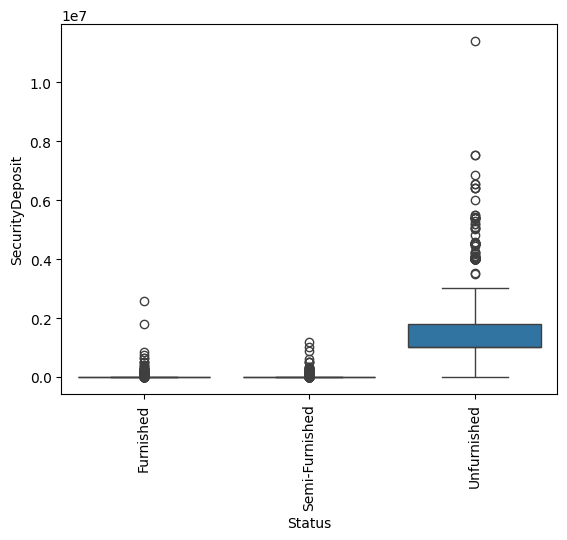

In [326]:
for col in lst_numeric_cols:
    _analyzer.analyze_anova_table_for_continous_vs_categories(col, 'Status', df_temp)
    sns.boxplot(data=df_temp, x='Status', y=col)
    plt.xticks(rotation=90)
    plt.show()

## Detect Outlier and treatment

Seem we have many outlier, we can seperate into 2 case.  
* Keep all outlier and apply RobustScaler
* Remove all outlier and apply MinMaxScaler

### Case 1: Keep all outlier

In [327]:

_df_house_in_keep = pd.concat([input_category_df, input_numeric_df, output_df], axis=1)
_df_house_in_keep.head(5)

,house_type,location,verificationDate,Status,house_size,numBathrooms,SecurityDeposit,price
0,1 RK Studio Apartment,Kalkaji,a day,Furnished,400.0,1.0,0.0,22000
1,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished,400.0,1.0,0.0,20000
2,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished,500.0,1.0,0.0,8500
3,3 BHK Independent House,Model Town,a year,Furnished,1020.0,3.0,0.0,48000
4,2 BHK Apartment,Rare,a year,Unfurnished,810.0,2.0,0.0,20000


### Case 2: Remove all oulier

In [328]:
# def remove_outliers(col:str, data:pd.DataFrame) -> pd.DataFrame:

#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)

#     lower = Q1 - 1.5*(Q3 - Q1)
#     upper = Q3 + 1.5*(Q3 - Q1)

#     return data[(data[col] > lower) & (data[col] < upper)]

df_temp = pd.concat([input_category_df, input_numeric_df, output_df], axis=1)
df_temp.head(5)

,house_type,location,verificationDate,Status,house_size,numBathrooms,SecurityDeposit,price
0,1 RK Studio Apartment,Kalkaji,a day,Furnished,400.0,1.0,0.0,22000
1,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished,400.0,1.0,0.0,20000
2,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished,500.0,1.0,0.0,8500
3,3 BHK Independent House,Model Town,a year,Furnished,1020.0,3.0,0.0,48000
4,2 BHK Apartment,Rare,a year,Unfurnished,810.0,2.0,0.0,20000


In [329]:
results = []
for col in lst_numeric_cols:
    results.append(_analyzer.check_outlier_of_numerical_variable(col, df_temp))

variable house_size have 0.023% upper outlier
variable house_size have 0.0% lower outlier
variable numBathrooms have 0.184% upper outlier
variable numBathrooms have 0.0% lower outlier
variable SecurityDeposit have 3.534% upper outlier
variable SecurityDeposit have 0.0% lower outlier


In [330]:
# total outliers
total_index_outliers = []
for res in results:
    lst = list(res[0]) + (list(res[1]))
    total_index_outliers = total_index_outliers + lst
total_index_outliers = list(set(total_index_outliers))
len(total_index_outliers)

160

In [331]:
_df_house_in_remove_outlier = df_temp.drop(index=total_index_outliers).reset_index(drop=True)
_df_house_in_remove_outlier.head()

,house_type,location,verificationDate,Status,house_size,numBathrooms,SecurityDeposit,price
0,1 RK Studio Apartment,Kalkaji,a day,Furnished,400.0,1.0,0.0,22000
1,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished,400.0,1.0,0.0,20000
2,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished,500.0,1.0,0.0,8500
3,3 BHK Independent House,Model Town,a year,Furnished,1020.0,3.0,0.0,48000
4,2 BHK Apartment,Rare,a year,Unfurnished,810.0,2.0,0.0,20000


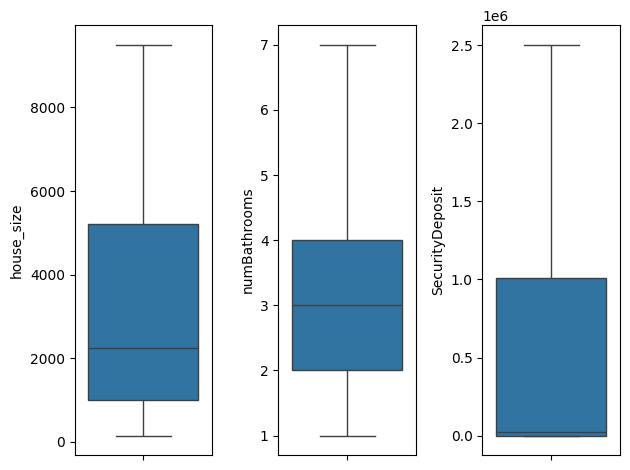

In [332]:
plt.subplot(1, 3, 1)
sns.boxplot(data=_df_house_in_remove_outlier, y='house_size')
plt.subplot(1, 3, 2)
sns.boxplot(data=_df_house_in_remove_outlier, y='numBathrooms')
plt.subplot(1, 3, 3)
sns.boxplot(data=_df_house_in_remove_outlier, y='SecurityDeposit')
plt.tight_layout()
plt.show()

Finally, we have 2 case
* `_df_house_in_keep` which keep all outlier 
* `_df_house_in_remove_outlier` which remove outlier all numeric variables

## Data Standardization

In [333]:
_df_house_in_keep.head()

,house_type,location,verificationDate,Status,house_size,numBathrooms,SecurityDeposit,price
0,1 RK Studio Apartment,Kalkaji,a day,Furnished,400.0,1.0,0.0,22000
1,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished,400.0,1.0,0.0,20000
2,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished,500.0,1.0,0.0,8500
3,3 BHK Independent House,Model Town,a year,Furnished,1020.0,3.0,0.0,48000
4,2 BHK Apartment,Rare,a year,Unfurnished,810.0,2.0,0.0,20000


In [334]:
_df_house_in_remove_outlier.head()

,house_type,location,verificationDate,Status,house_size,numBathrooms,SecurityDeposit,price
0,1 RK Studio Apartment,Kalkaji,a day,Furnished,400.0,1.0,0.0,22000
1,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished,400.0,1.0,0.0,20000
2,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished,500.0,1.0,0.0,8500
3,3 BHK Independent House,Model Town,a year,Furnished,1020.0,3.0,0.0,48000
4,2 BHK Apartment,Rare,a year,Unfurnished,810.0,2.0,0.0,20000


### Scaler for non outlier data

In [335]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [336]:
mms = MinMaxScaler()

In [337]:
minmax_scaler_df = mms.fit_transform(_df_house_in_remove_outlier[lst_numeric_cols])

In [338]:
minmax_scaler_df = pd.DataFrame(minmax_scaler_df, columns=lst_numeric_cols).add_prefix('S_')


In [339]:
minmax_scaler_df.head(5) 

,S_house_size,S_numBathrooms,S_SecurityDeposit
0,0.026738,0.000000,0.0
1,0.026738,0.000000,0.0
2,0.037433,0.000000,0.0
3,0.093048,0.333333,0.0
4,0.070588,0.166667,0.0


In [340]:
_df_house_in_remove_outlier_scaled = pd.concat([_df_house_in_remove_outlier, minmax_scaler_df], axis=1)

In [341]:
_df_house_in_remove_outlier_scaled.head()

,house_type,location,verificationDate,Status,house_size,numBathrooms,SecurityDeposit,price,S_house_size,S_numBathrooms,S_SecurityDeposit
0,1 RK Studio Apartment,Kalkaji,a day,Furnished,400.0,1.0,0.0,22000,0.026738,0.000000,0.0
1,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished,400.0,1.0,0.0,20000,0.026738,0.000000,0.0
2,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished,500.0,1.0,0.0,8500,0.037433,0.000000,0.0
3,3 BHK Independent House,Model Town,a year,Furnished,1020.0,3.0,0.0,48000,0.093048,0.333333,0.0
4,2 BHK Apartment,Rare,a year,Unfurnished,810.0,2.0,0.0,20000,0.070588,0.166667,0.0


### Scaler for outlier data

In [342]:
rs = RobustScaler()


In [343]:
robust_scaler_df = rs.fit_transform(_df_house_in_keep[lst_numeric_cols])

In [344]:
robust_scaler_df = pd.DataFrame(robust_scaler_df, columns = lst_numeric_cols).add_prefix('S_')

In [345]:
_df_house_in_keep_scaled = pd.concat([_df_house_in_keep, robust_scaler_df], axis=1)

In [346]:
_df_house_in_keep_scaled.head()

,house_type,location,verificationDate,Status,house_size,numBathrooms,SecurityDeposit,price,S_house_size,S_numBathrooms,S_SecurityDeposit
0,1 RK Studio Apartment,Kalkaji,a day,Furnished,400.0,1.0,0.0,22000,-0.433795,-1.0,-0.035573
1,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished,400.0,1.0,0.0,20000,-0.433795,-1.0,-0.035573
2,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished,500.0,1.0,0.0,8500,-0.413138,-1.0,-0.035573
3,3 BHK Independent House,Model Town,a year,Furnished,1020.0,3.0,0.0,48000,-0.305722,0.0,-0.035573
4,2 BHK Apartment,Rare,a year,Unfurnished,810.0,2.0,0.0,20000,-0.349101,-0.5,-0.035573


Finally, we have 2 options:
* `_df_house_in_remove_outlier` for non outlier data which apply MinMaxScaler
* `_df_house_in_keep` for outlier data which apply RobustScaler

## Feature Engineering

In [347]:
from sklearn.preprocessing import OneHotEncoder

### Encoder for non outlier data

In [348]:
_df_house_in_remove_outlier_scaled[lst_category_cols].head()

,house_type,location,verificationDate,Status
0,1 RK Studio Apartment,Kalkaji,a day,Furnished
1,1 RK Studio Apartment,Mansarover Garden,9 days,Furnished
2,2 BHK Independent Floor,Uttam Nagar,12 days,Semi-Furnished
3,3 BHK Independent House,Model Town,a year,Furnished
4,2 BHK Apartment,Rare,a year,Unfurnished


In [349]:
lst_nomial_cat = ['location', 'Status']
for col in lst_nomial_cat:
    ohe = OneHotEncoder(drop='first')
    location_encoded = ohe.fit_transform(_df_house_in_remove_outlier_scaled[[col]]).toarray()
    location_encoded_df = pd.DataFrame(location_encoded, columns=ohe.categories_[0][1:]).add_prefix("E_")
    _df_house_in_remove_outlier = pd.concat([_df_house_in_remove_outlier, location_encoded_df], axis=1)
    _df_house_in_remove_outlier_scaled = pd.concat([_df_house_in_remove_outlier_scaled, location_encoded_df], axis=1)

_df_house_in_remove_outlier.drop(columns=lst_nomial_cat, axis=1, inplace=True)
_df_house_in_remove_outlier_scaled.drop(columns=lst_nomial_cat, axis=1, inplace=True)

In [350]:
_df_house_in_remove_outlier_scaled.head()

,house_type,verificationDate,house_size,numBathrooms,SecurityDeposit,price,S_house_size,S_numBathrooms,S_SecurityDeposit,E_Anand Vihar,...,E_Uttam Nagar west,E_Uttari Pitampura,E_Vasant Kunj,E_Vasant Vihar,E_West End,E_laxmi nagar,E_mayur vihar phase 1,E_vikaspuri,E_Semi-Furnished,E_Unfurnished
0,1 RK Studio Apartment,a day,400.0,1.0,0.0,22000,0.026738,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1 RK Studio Apartment,9 days,400.0,1.0,0.0,20000,0.026738,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2 BHK Independent Floor,12 days,500.0,1.0,0.0,8500,0.037433,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3 BHK Independent House,a year,1020.0,3.0,0.0,48000,0.093048,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2 BHK Apartment,a year,810.0,2.0,0.0,20000,0.070588,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [351]:
from sklearn.preprocessing import LabelEncoder

In [352]:
lbe = LabelEncoder()
_df_house_in_remove_outlier.house_type = lbe.fit_transform(_df_house_in_remove_outlier.house_type)
_df_house_in_remove_outlier_scaled.house_type = lbe.fit_transform(_df_house_in_remove_outlier_scaled.house_type)

In [353]:
_df_house_in_remove_outlier.verificationDate = lbe.fit_transform(_df_house_in_remove_outlier.verificationDate)
_df_house_in_remove_outlier_scaled.verificationDate = lbe.fit_transform(_df_house_in_remove_outlier_scaled.verificationDate)

In [354]:
_df_house_in_remove_outlier_scaled.head()

,house_type,verificationDate,house_size,numBathrooms,SecurityDeposit,price,S_house_size,S_numBathrooms,S_SecurityDeposit,E_Anand Vihar,...,E_Uttam Nagar west,E_Uttari Pitampura,E_Vasant Kunj,E_Vasant Vihar,E_West End,E_laxmi nagar,E_mayur vihar phase 1,E_vikaspuri,E_Semi-Furnished,E_Unfurnished
0,2,29,400.0,1.0,0.0,22000,0.026738,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,27,400.0,1.0,0.0,20000,0.026738,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2,500.0,1.0,0.0,8500,0.037433,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,8,31,1020.0,3.0,0.0,48000,0.093048,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,31,810.0,2.0,0.0,20000,0.070588,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [355]:
# lst = data.verificationDate.unique()
# test_df = pd.DataFrame({'verificationDate' : lst})
# encoded_test_df = test_df.copy()
# encoded_test_df.verificationDate = lbe.fit_transform(encoded_test_df.verificationDate )
# pd.concat([test_df, encoded_test_df], axis=1)

### Encoder for outlier data

In [356]:
lst_nomial_cat = ['location', 'Status']
for col in lst_nomial_cat:
    ohe = OneHotEncoder(drop='first')
    location_encoded = ohe.fit_transform(_df_house_in_keep[[col]]).toarray()
    location_encoded_df = pd.DataFrame(location_encoded, columns=ohe.categories_[0][1:]).add_prefix("E_")
    _df_house_in_keep_scaled = pd.concat([_df_house_in_keep_scaled, location_encoded_df], axis=1)
    _df_house_in_keep = pd.concat([_df_house_in_keep, location_encoded_df], axis=1)

_df_house_in_keep.drop(columns=lst_nomial_cat, axis=1, inplace=True)
_df_house_in_keep_scaled.drop(columns=lst_nomial_cat, axis=1, inplace=True)

In [357]:
_df_house_in_keep_scaled.head()

,house_type,verificationDate,house_size,numBathrooms,SecurityDeposit,price,S_house_size,S_numBathrooms,S_SecurityDeposit,E_Anand Niketan,...,E_Uttam Nagar west,E_Uttari Pitampura,E_Vasant Kunj,E_Vasant Vihar,E_West End,E_laxmi nagar,E_mayur vihar phase 1,E_vikaspuri,E_Semi-Furnished,E_Unfurnished
0,1 RK Studio Apartment,a day,400.0,1.0,0.0,22000,-0.433795,-1.0,-0.035573,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1 RK Studio Apartment,9 days,400.0,1.0,0.0,20000,-0.433795,-1.0,-0.035573,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2 BHK Independent Floor,12 days,500.0,1.0,0.0,8500,-0.413138,-1.0,-0.035573,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3 BHK Independent House,a year,1020.0,3.0,0.0,48000,-0.305722,0.0,-0.035573,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2 BHK Apartment,a year,810.0,2.0,0.0,20000,-0.349101,-0.5,-0.035573,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [366]:
lbe = LabelEncoder()
_df_house_in_keep.house_type = lbe.fit_transform(_df_house_in_keep.house_type)
_df_house_in_keep.verificationDate = lbe.fit_transform(_df_house_in_keep.verificationDate)
_df_house_in_keep_scaled.house_type = lbe.fit_transform(_df_house_in_keep_scaled.house_type)
_df_house_in_keep_scaled.verificationDate = lbe.fit_transform(_df_house_in_keep_scaled.verificationDate)

In [367]:
_df_house_in_keep_scaled.head()

,house_type,verificationDate,house_size,numBathrooms,SecurityDeposit,price,S_house_size,S_numBathrooms,S_SecurityDeposit,E_Anand Niketan,...,E_Uttam Nagar west,E_Uttari Pitampura,E_Vasant Kunj,E_Vasant Vihar,E_West End,E_laxmi nagar,E_mayur vihar phase 1,E_vikaspuri,E_Semi-Furnished,E_Unfurnished
0,2,29,400.0,1.0,0.0,22000,-0.433795,-1.0,-0.035573,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,27,400.0,1.0,0.0,20000,-0.433795,-1.0,-0.035573,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2,500.0,1.0,0.0,8500,-0.413138,-1.0,-0.035573,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,8,31,1020.0,3.0,0.0,48000,-0.305722,0.0,-0.035573,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,31,810.0,2.0,0.0,20000,-0.349101,-0.5,-0.035573,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Now, we finished preprocessing data and move to modelling 

## Build model

In [555]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Case 1: Modelling for non outlier data with scaler

In [556]:
_df_house_in_remove_outlier_scaled.columns

Index(['house_type', 'verificationDate', 'house_size', 'numBathrooms',
       'SecurityDeposit', 'price', 'S_house_size', 'S_numBathrooms',
       'S_SecurityDeposit', 'E_Anand Vihar',
       ...
       'E_Uttam Nagar west', 'E_Uttari Pitampura', 'E_Vasant Kunj',
       'E_Vasant Vihar', 'E_West End', 'E_laxmi nagar',
       'E_mayur vihar phase 1', 'E_vikaspuri', 'E_Semi-Furnished',
       'E_Unfurnished'],
      dtype='object', length=116)

In [557]:
model_10 = LinearRegression()

In [558]:
X = _df_house_in_remove_outlier_scaled.drop(columns=['house_size', 'numBathrooms', 'SecurityDeposit', 'price'], axis=1)
y = _df_house_in_remove_outlier_scaled['price']

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [560]:
model_10.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [561]:
y_hat_test = model_10.predict(X_test)
y_hat_train = model_10.predict(X_train)

In [562]:
from sklearn.metrics import r2_score, mean_squared_error

In [563]:
score_test = np.round(r2_score(y_test, y_hat_test), 3)
score_train = np.round(r2_score(y_train, y_hat_train), 3)
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.round(np.sqrt(mse_train), 3)
rmse_test = np.round(np.sqrt(mse_test), 3)
print(f'score of training without outlier: {score_train}')
print(f'score of test without outlier: {score_test}')
print(f'rmse of training without outlier: {rmse_train}')
print(f'rmse of test without outlier: {rmse_test}')

score of training without outlier: 0.847
score of test without outlier: 0.871
rmse of training without outlier: 67644.665
rmse of test without outlier: 60481.347


### Case 1.1: Modelling for outlier data with scaler

In [564]:
_df_house_in_keep_scaled.columns

Index(['house_type', 'verificationDate', 'house_size', 'numBathrooms',
       'SecurityDeposit', 'price', 'S_house_size', 'S_numBathrooms',
       'S_SecurityDeposit', 'E_Anand Niketan',
       ...
       'E_Uttam Nagar west', 'E_Uttari Pitampura', 'E_Vasant Kunj',
       'E_Vasant Vihar', 'E_West End', 'E_laxmi nagar',
       'E_mayur vihar phase 1', 'E_vikaspuri', 'E_Semi-Furnished',
       'E_Unfurnished'],
      dtype='object', length=123)

In [565]:
model_11 = LinearRegression()

In [566]:
X = _df_house_in_keep_scaled.drop(columns=['house_size', 'numBathrooms', 'SecurityDeposit', 'price'], axis=1)
y =  _df_house_in_keep_scaled['price']

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [568]:
model_11.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [569]:
y_hat_test = model_11.predict(X_test)
y_hat_train = model_11.predict(X_train)

In [570]:
score_test = np.round(r2_score(y_test, y_hat_test), 3)
score_train = np.round(r2_score(y_train, y_hat_train), 3)
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.round(np.sqrt(mse_train), 3)
rmse_test = np.round(np.sqrt(mse_test), 3)
print(f'score of training without outlier: {score_train}')
print(f'score of test without outlier: {score_test}')
print(f'rmse of training without outlier: {rmse_train}')
print(f'rmse of test without outlier: {rmse_test}')

score of training without outlier: 0.892
score of test without outlier: 0.917
rmse of training without outlier: 88197.115
rmse of test without outlier: 78568.548


### Case 2: Modelling for non outlier data without scaler

In [571]:
_df_house_in_remove_outlier.columns

Index(['house_type', 'verificationDate', 'house_size', 'numBathrooms',
       'SecurityDeposit', 'price', 'E_Anand Vihar', 'E_Ashok Nagar',
       'E_Bindapur', 'E_Chattarpur',
       ...
       'E_Uttam Nagar west', 'E_Uttari Pitampura', 'E_Vasant Kunj',
       'E_Vasant Vihar', 'E_West End', 'E_laxmi nagar',
       'E_mayur vihar phase 1', 'E_vikaspuri', 'E_Semi-Furnished',
       'E_Unfurnished'],
      dtype='object', length=113)

In [572]:
model_20 = LinearRegression()

In [573]:
X = _df_house_in_remove_outlier.drop(columns=['price'], axis=1)
y = _df_house_in_remove_outlier['price']

In [574]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [575]:
model_20.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [576]:
y_hat_test = model_20.predict(X_test)
y_hat_train = model_20.predict(X_train)

In [577]:
score_test = np.round(r2_score(y_test, y_hat_test), 3)
score_train = np.round(r2_score(y_train, y_hat_train), 3)
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.round(np.sqrt(mse_train), 3)
rmse_test = np.round(np.sqrt(mse_test), 3)
print(f'score of training without outlier: {score_train}')
print(f'score of test without outlier: {score_test}')
print(f'rmse of training without outlier: {rmse_train}')
print(f'rmse of test without outlier: {rmse_test}')

score of training without outlier: 0.877
score of test without outlier: 0.787
rmse of training without outlier: 59341.692
rmse of test without outlier: 82916.955


### 2.1 Modelling for outlier data without scaler

In [578]:
_df_house_in_keep.columns

Index(['house_type', 'verificationDate', 'house_size', 'numBathrooms',
       'SecurityDeposit', 'price', 'E_Anand Niketan', 'E_Anand Vihar',
       'E_Ashok Nagar', 'E_Aurungzeb Road',
       ...
       'E_Uttam Nagar west', 'E_Uttari Pitampura', 'E_Vasant Kunj',
       'E_Vasant Vihar', 'E_West End', 'E_laxmi nagar',
       'E_mayur vihar phase 1', 'E_vikaspuri', 'E_Semi-Furnished',
       'E_Unfurnished'],
      dtype='object', length=120)

In [579]:
model_21 = LinearRegression()

In [580]:
X = _df_house_in_keep.drop(columns=['price'], axis=1)
y =  _df_house_in_keep['price']

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [582]:
model_21.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [583]:
y_hat_test = model_21.predict(X_test)
y_hat_train = model_21.predict(X_train)

In [584]:
score_test = np.round(r2_score(y_test, y_hat_test), 3)
score_train = np.round(r2_score(y_train, y_hat_train), 3)
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.round(np.sqrt(mse_train), 3)
rmse_test = np.round(np.sqrt(mse_test), 3)
print(f'score of training without outlier: {score_train}')
print(f'score of test without outlier: {score_test}')
print(f'rmse of training without outlier: {rmse_train}')
print(f'rmse of test without outlier: {rmse_test}')

score of training without outlier: 0.897
score of test without outlier: 0.904
rmse of training without outlier: 86069.128
rmse of test without outlier: 85241.854


## Conclusion

## Summary

|Remove outlier|Apply Scaler|R2 train|rmse train|R2 test|rmse test|
|---|---|---|---|---|---|
|Yes|Yes|0.847|67644.665|0.871|60481.347|
|No|Yes|0.892|88197.155|0.917|78568.548|
|Yes|No|0.877|59341.692|0.787|82916.955|
|No|No|0.897|86069.128|0.904|85241.854|

Conclusion: 
* Apply scaler not impact to result of model
* Remove Outlier make model have lower rmse

In [585]:
"""
The best result is the model at case 1.1 (model11) with high R^2 in both 
train and test set, but rmse in train test is highest in 4 cases.

although remove outlier have small rmse, it lower in R square in both 
train and test (case model10 and model20)

applying scaler is not impacted too much, if we consider model10 and model 20
the R2 is reduced nearly 10% (this is also depend on test/train when splitting). This is also the case for model11 and model22, just
reducing to 0.1%
"""

'\nThe best result is the model at case 1.1 (model11) with high R^2 in both \ntrain and test set, but rmse in train test is highest in 4 cases.\n\nalthough remove outlier have small rmse, it lower in R square in both \ntrain and test (case model10 and model20)\n\napplying scaler is not impacted too much, if we consider model10 and model 20\nthe R2 is reduced nearly 10% (this is also depend on test/train when splitting). This is also the case for model11 and model22, just\nreducing to 0.1%\n'